<a href="https://colab.research.google.com/github/imperialHCE/theprojects/blob/master/bank_loan_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#importing data
apd = pd.read_csv('application_data.csv')
pra = pd.read_csv('previous_application.csv')

In [32]:
apd.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [33]:
#checking info of columns
apd.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131974 entries, 0 to 131973
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DA

In [34]:
apd.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  131974.000000  131974.000000  131974.000000      1.319740e+05   
mean   176547.303151       0.081319       0.418332      1.692161e+05   
std     44183.333420       0.273325       0.720686      3.380668e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    138236.500000       0.000000       0.000000      1.125000e+05   
50%    176525.500000       0.000000       0.000000      1.440000e+05   
75%    214925.750000       0.000000       1.000000      2.025000e+05   
max    253061.000000       1.000000      12.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.319740e+05  131966.000000     1.318680e+05   
mean   5.990228e+05   27097.961835     5.384692e+05   
std    4.026877e+05   14552.500702     3.699954e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16479.000000     2.385000e+05   
50%    5.130000e+05   24885.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               131973.000000  131973.000000  131973.000000  ...   
mean                     0.020859  -16028.972987   63786.785524  ...   
std                      0.013819    4370.492940  141247.286771  ...   
min                      0.000533  -25201.000000  -17531.000000  ...   
25%                      0.010006  -19680.000000   -2752.000000  ...   
50%                      0.018850  -15734.000000   -1211.000000  ...   
75%                      0.028663  -12390.000000    -287.000000  ...   
max                      0.072508   -7676.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     131973.000000     131973.000000     131973.000000     131973.000000   
mean           0.008191          0.000591          0.000530          0.000311   
std            0.090133          0.024304          0.023025          0.017623   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               114264.000000              114264.000000   
mean                     0.006459                   0.007141   
std                      0.084984                   0.112268   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               114264.000000              114264.000000   
mean                     0.033624                   0.267486   
std                      0.203391                   0.923211   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  24.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              114264.000000               114264.000000  
mean                    0.264055                    1.890552  
std                     0.611030                    1.868991  
min                     0.000000                    0.000000  
25%              

In [9]:
def nullval(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [35]:
nullval(apd)

COMMONAREA_MEDI             69.85
COMMONAREA_AVG              69.85
COMMONAREA_MODE             69.85
NONLIVINGAPARTMENTS_MODE    69.38
NONLIVINGAPARTMENTS_AVG     69.38
                            ...  
NAME_INCOME_TYPE             0.00
NAME_EDUCATION_TYPE          0.00
NAME_FAMILY_STATUS           0.00
TARGET                       0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

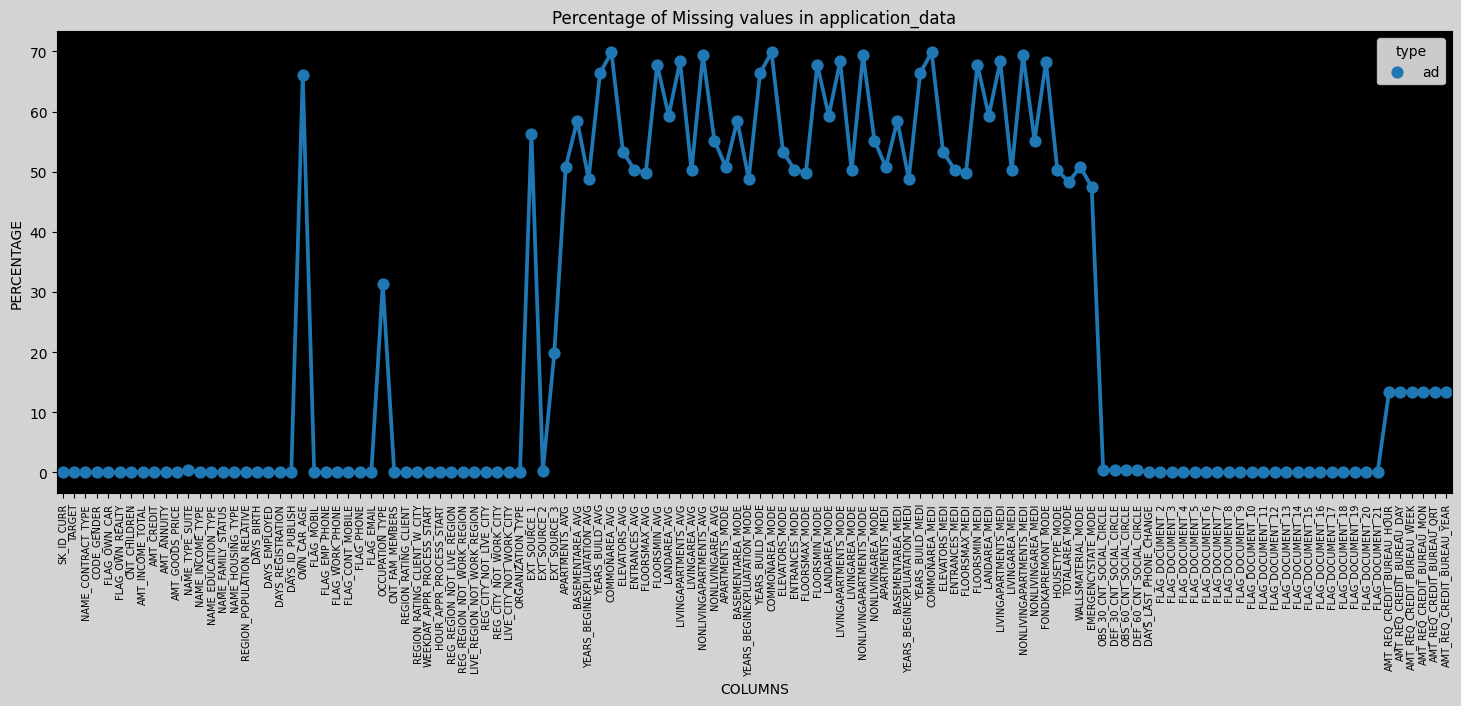

In [36]:

    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((apd.isnull().sum())*100/apd.shape[0]).reset_index()
    miss_data["type"] = "ad"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in application_data")
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [37]:
#creating a variable null_col_40 for storing null columns having missing values more than 40%
null_col_40 = nullval(apd)[nullval(apd)>40]
print("following columns have null value more than 40%")
print(null_col_40.index)
print("No. of columns with more than 40% missing value:",len(null_col_40.index))

following columns have null value more than 40%
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOO

In [38]:
apd.drop(columns = null_col_40.index, inplace = True)

In [39]:
apd.shape

(131974, 73)

In [40]:
nullval(apd)[nullval(apd)>0]

OCCUPATION_TYPE               31.39
EXT_SOURCE_3                  19.78
AMT_REQ_CREDIT_BUREAU_YEAR    13.42
AMT_REQ_CREDIT_BUREAU_QRT     13.42
AMT_REQ_CREDIT_BUREAU_MON     13.42
AMT_REQ_CREDIT_BUREAU_WEEK    13.42
AMT_REQ_CREDIT_BUREAU_DAY     13.42
AMT_REQ_CREDIT_BUREAU_HOUR    13.42
NAME_TYPE_SUITE                0.41
OBS_30_CNT_SOCIAL_CIRCLE       0.34
DEF_30_CNT_SOCIAL_CIRCLE       0.34
OBS_60_CNT_SOCIAL_CIRCLE       0.34
DEF_60_CNT_SOCIAL_CIRCLE       0.34
EXT_SOURCE_2                   0.22
AMT_GOODS_PRICE                0.08
AMT_ANNUITY                    0.01
dtype: float64

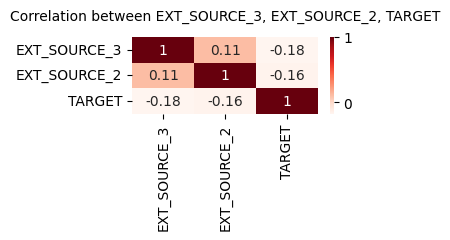

In [42]:
#removing extra columns
#putting irrelevent columns in 1 variable
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]
#making a heatmap
plt.figure(figsize= [3,1])
sns.heatmap(apd[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":10}, pad=12)
plt.show()

In [43]:
apd.drop(irrev, axis=1, inplace= True)

In [44]:
apd.shape

(131974, 71)

In [45]:
#flag columns
flag=[col for col in ad.columns if "FLAG" in col]
flag

[]

In [47]:
flag_df=apd[flag+["TARGET"]]


In [48]:
#according to column description ->1 implies defaulter, 0 implies repayer
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

<ipython-input-48-2b051ab76e90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})


In [49]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [50]:
flag_df.head()

TARGET
0  Defaulter
1    Repayer
2    Repayer
3    Repayer
4    Repayer

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('TARGET').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TARGET')):
  _plot_series(series, series_name, i)
  fig.legend(title='TARGET', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['TARGET'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='TARGET', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

<Figure size 2000x2400 with 0 Axes>

In [54]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "appl_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

KeyError: ignored

In [29]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

ad.drop(flag_df.columns, axis=1, inplace= True)

In [30]:
ad.shape

(21340, 42)

In [ ]:
nullval(apd).head(15)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
dtype: float64

In [ ]:
#starting with occupation type
apd["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [55]:
apd["OCCUPATION_TYPE"]=apd["OCCUPATION_TYPE"].fillna("Unknown")

In [56]:
apd["OCCUPATION_TYPE"].isnull().sum() #zero null value left

0

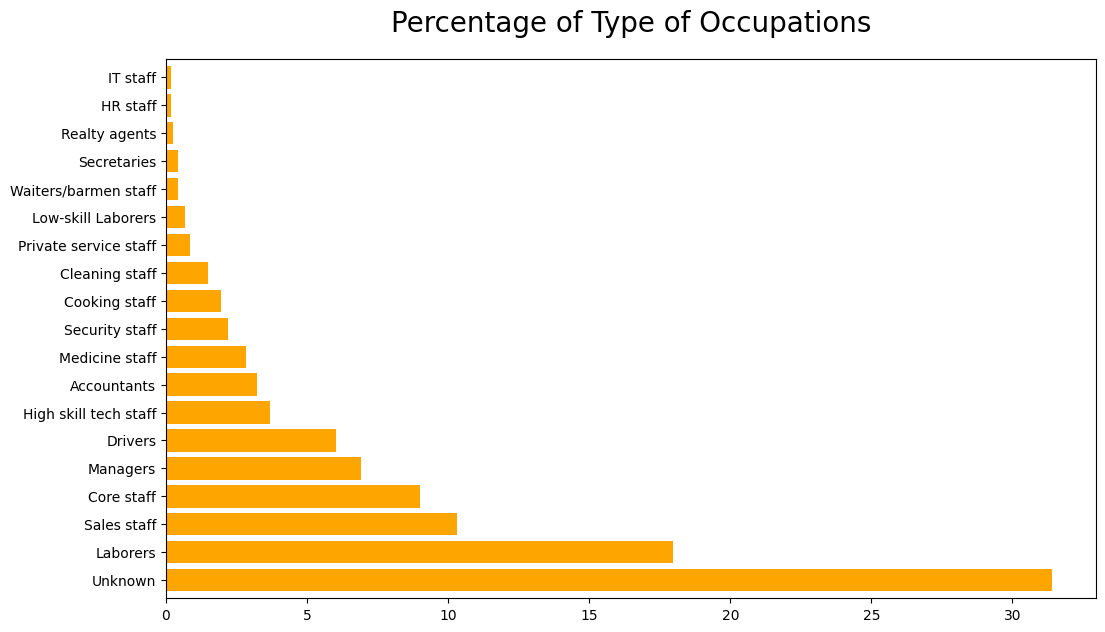

In [57]:
plt.figure(figsize = [12,7])
(apd["OCCUPATION_TYPE"].value_counts(normalize=True)*100).plot.barh(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

In [58]:
amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
apd[amt_credit].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               114264.000000              114264.000000   
mean                     1.890552                   0.264055   
std                      1.868991                   0.611030   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                   8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              114264.000000               114264.000000   
mean                    0.267486                    0.033624   
std                     0.923211                    0.203391   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    24.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              114264.000000               114264.000000  
mean                    0.007141                    0.006459  
std                     0.112268                    0.084984  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    3.000000

In [59]:
apd[amt_credit].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

In [60]:
apd.fillna(apd[amt_credit].median(),inplace=True)

In [61]:
nullval(apd).head(10)

NAME_TYPE_SUITE             0.41
DEF_60_CNT_SOCIAL_CIRCLE    0.34
OBS_60_CNT_SOCIAL_CIRCLE    0.34
DEF_30_CNT_SOCIAL_CIRCLE    0.34
OBS_30_CNT_SOCIAL_CIRCLE    0.34
AMT_GOODS_PRICE             0.08
AMT_ANNUITY                 0.01
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
REG_CITY_NOT_WORK_CITY      0.00
dtype: float64

In [62]:
apd["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      106627
Family              17304
Spouse, partner      4857
Children             1419
Other_B               743
Other_A               361
Group of people       124
Name: NAME_TYPE_SUITE, dtype: int64

In [63]:
apd["NAME_TYPE_SUITE"]=apd["NAME_TYPE_SUITE"].fillna("Unaccompanied") #BECAUSE UNACCOMPANIED IS THE MODE

In [64]:
apd["NAME_TYPE_SUITE"].isnull().sum()

0

In [65]:
a=["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

In [66]:
apd[a].describe()

DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             131529.000000             131529.000000   
mean                   0.099355                  1.407963   
std                    0.358281                  2.302480   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                    5.000000                 47.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
count             131529.000000             131529.000000  
mean                   0.142797                  1.424880  
std                    0.441054                  2.322328  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    0.000000                  2.000000  
max                    6.000000                 47.000000

In [67]:
apd[a].median()

DEF_60_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_30_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [68]:
apd.fillna(apd[a].median(),inplace=True) #REPLACE WITH MEDIAN

In [69]:
nullval(apd).head()

AMT_GOODS_PRICE           0.08
AMT_ANNUITY               0.01
CNT_FAM_MEMBERS           0.00
DAYS_LAST_PHONE_CHANGE    0.00
ORGANIZATION_TYPE         0.00
dtype: float64

In [70]:
apd["AMT_GOODS_PRICE"].describe()

count    1.318680e+05
mean     5.384692e+05
std      3.699954e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [71]:
apd["AMT_GOODS_PRICE"].isnull().sum() #REPLACED WITH MEDIAN

106

In [72]:
apd.fillna(apd["AMT_GOODS_PRICE"].median(),inplace=True)

In [73]:
nullval(apd)

SK_ID_CURR                    0.0
FLAG_DOCUMENT_2               0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
DAYS_ID_PUBLISH               0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 71, dtype: float64

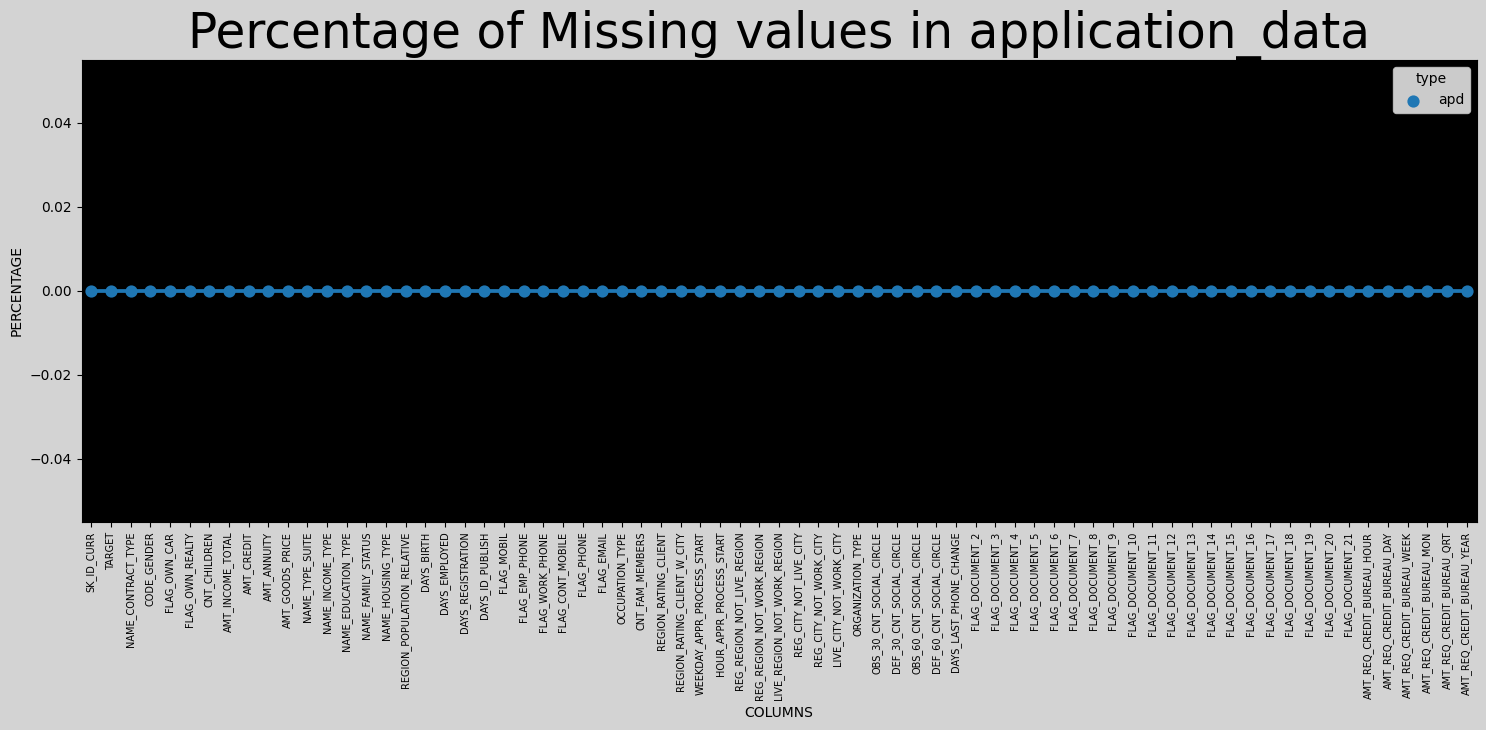

In [74]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((apd.isnull().sum())*100/apd.shape[0]).reset_index()
    miss_data["type"] = "apd"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in application_data",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [75]:
#STANDARDIZING VALUES
# Binning Numerical Columns to create a categorical column
# Creating bins for income amount in term of Lakhs
apd['AMT_INCOME_TOTAL']=apd['AMT_INCOME_TOTAL']/100000

In [76]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1170]#1170 is the largest value
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_INCOME_RANGE']=pd.cut(apd['AMT_INCOME_TOTAL'],bins,labels=slot)

In [77]:
apd["AMT_INCOME_RANGE"].value_counts(normalize=True)*100

1L-2L        50.738024
2L-3L        21.051874
0-1L         20.765454
3L-4L         4.816100
4L-5L         1.742768
5L-6L         0.350069
6L-7L         0.283389
8L-9L         0.107597
10L Above     0.084107
7L-8L         0.055314
9L-10L        0.005304
Name: AMT_INCOME_RANGE, dtype: float64

In [78]:
# Creating bins for Credit amount in term of Lakhs
apd['AMT_CREDIT']=apd['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,41] #40.5 is the highest amount
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_CREDIT_RANGE']=pd.cut(apd['AMT_CREDIT'],bins=bins,labels=slots)

In [79]:
apd['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

2L-3L        17.864882
10L Above    16.254717
5L-6L        11.021868
4L-5L        10.424781
1L-2L         9.882250
3L-4L         8.460757
6L-7L         7.861397
8L-9L         7.142316
7L-8L         6.233046
9L-10L        2.893752
0-1L          1.960235
Name: AMT_CREDIT_RANGE, dtype: float64

In [80]:
# Creating bins for Price of Goods in term of Lakhs
apd['AMT_GOODS_PRICE']=apd['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,41] #40.5 is the highest value
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_GOODS_PRICE_RANGE']=pd.cut(apd['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [81]:
apd['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

2L-3L        20.400988
4L-5L        18.511980
6L-7L        13.028324
10L Above    11.115068
1L-2L        10.862746
8L-9L         7.028657
3L-4L         6.862715
5L-6L         4.219771
0-1L          2.812675
7L-8L         2.661888
9L-10L        2.495188
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [82]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

apd[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  131974.000000  131974.000000      131974.000000    131974.000000   
mean   -16025.441769   63789.711958       -4981.201767     -2990.547706   
std      4554.856060  141250.752474        3740.134219      1958.792663   
min    -25201.000000  -17531.000000      -22392.000000     -7197.000000   
25%    -19680.000000   -2752.000000       -7472.000000     -4298.000000   
50%    -15734.000000   -1211.000000       -4491.000000     -3256.000000   
75%    -12390.000000    -287.000000       -2009.000000     -1714.000000   
max    450000.000000  450000.000000      450000.000000    450000.000000   

       DAYS_LAST_PHONE_CHANGE  
count           131974.000000  
mean              -955.372596  
std               1940.551131  
min              -4153.000000  
25%              -1570.000000  
50%               -756.000000  
75%               -272.000000  
max             450000.000000

In [83]:
apd[days_col]=abs(apd[days_col])
apd[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  131974.000000  131974.000000      131974.000000    131974.000000   
mean    16032.261294   67691.746192        4988.021292      2997.367231   
std      4530.793944  139422.831832        3731.034454      1948.341256   
min      7676.000000       0.000000           0.000000         0.000000   
25%     12390.000000     929.000000        2009.000000      1714.000000   
50%     15734.000000    2207.000000        4491.500000      3256.000000   
75%     19680.000000    5697.750000        7472.000000      4298.000000   
max    450000.000000  450000.000000      450000.000000    450000.000000   

       DAYS_LAST_PHONE_CHANGE  
count           131974.000000  
mean               969.011646  
std               1933.776544  
min                  0.000000  
25%                272.000000  
50%                756.000000  
75%               1570.000000  
max             450000.000000

In [84]:
#days brith to age
apd["AGE"] = abs(apd["DAYS_BIRTH"]/365)
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

apd["AGE_GROUP"] = pd.cut(apd["AGE"], bins=bins, labels=slots)

In [85]:
apd["AGE_GROUP"].value_counts(normalize=True)*100

35-40       14.015746
40-45       13.310298
30-35       12.903397
60 Above    11.579641
45-50       11.391724
50-55       11.312162
55-60       10.799179
25-30       10.707493
20-25        3.980360
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [86]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

apd["YEARS_EMPLOYED"] = apd["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,1001] #1000.5 was largest value
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

apd["EMPLOYEMENT_YEARS"] = pd.cut(apd["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [87]:
apd["EMPLOYEMENT_YEARS"].value_counts(normalize=True)*100

0-5         44.449917
5-10        21.075085
30 Above    18.976139
10-15        8.848914
15-20        3.523501
20-25        2.045146
25-30        1.081298
Name: EMPLOYEMENT_YEARS, dtype: float64

In [88]:
#OUTLIERS

In [89]:
apd.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  131974.000000  131974.000000  131974.000000     131974.000000   
mean   176547.303151       0.081319       0.418332          1.692161   
std     44183.333420       0.273325       0.720686          3.380668   
min    100002.000000       0.000000       0.000000          0.256500   
25%    138236.500000       0.000000       0.000000          1.125000   
50%    176525.500000       0.000000       0.000000          1.440000   
75%    214925.750000       0.000000       1.000000          2.025000   
max    253061.000000       1.000000      12.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  131974.000000  131974.000000    131974.000000   
mean        5.990228   27123.597311         5.383982   
std         4.026877   14919.891393         3.698553   
min         0.450000    1980.000000         0.450000   
25%         2.700000   16480.125000         2.385000   
50%         5.130000   24885.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  450000.000000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               131974.000000  131974.000000  131974.000000  ...   
mean                     3.430621   16032.261294   67691.746192  ...   
std                   1238.706178    4530.793944  139422.831832  ...   
min                      0.000533    7676.000000       0.000000  ...   
25%                      0.010006   12390.000000     929.000000  ...   
50%                      0.018850   15734.000000    2207.000000  ...   
75%                      0.028663   19680.000000    5697.750000  ...   
max                 450000.000000  450000.000000  450000.000000  ...   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     131974.000000     131974.000000               131974.000000   
mean           3.410293          3.410073                    0.005592   
std         1238.706234       1238.706235                    0.079107   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max       450000.000000     450000.000000                    3.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              131974.000000               131974.000000   
mean                    0.006183                    0.029112   
std                     0.104492                    0.189599   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              131974.000000              131974.000000   
mean                    0.231591                   0.228621   
std                     0.863861                   0.575635   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    24.000000                   8.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEARS_EMPLOYED  
count               131974.000000  131974.000000   131974.000000  
mean                     1.771046      43.924004      185.456839  
std                      1.765366      12.413134      381.980361  
min                      0.000000      21.030137        0.000000  
25%                      1.000000      33.945205        2.545205  
50

In [90]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS"]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/

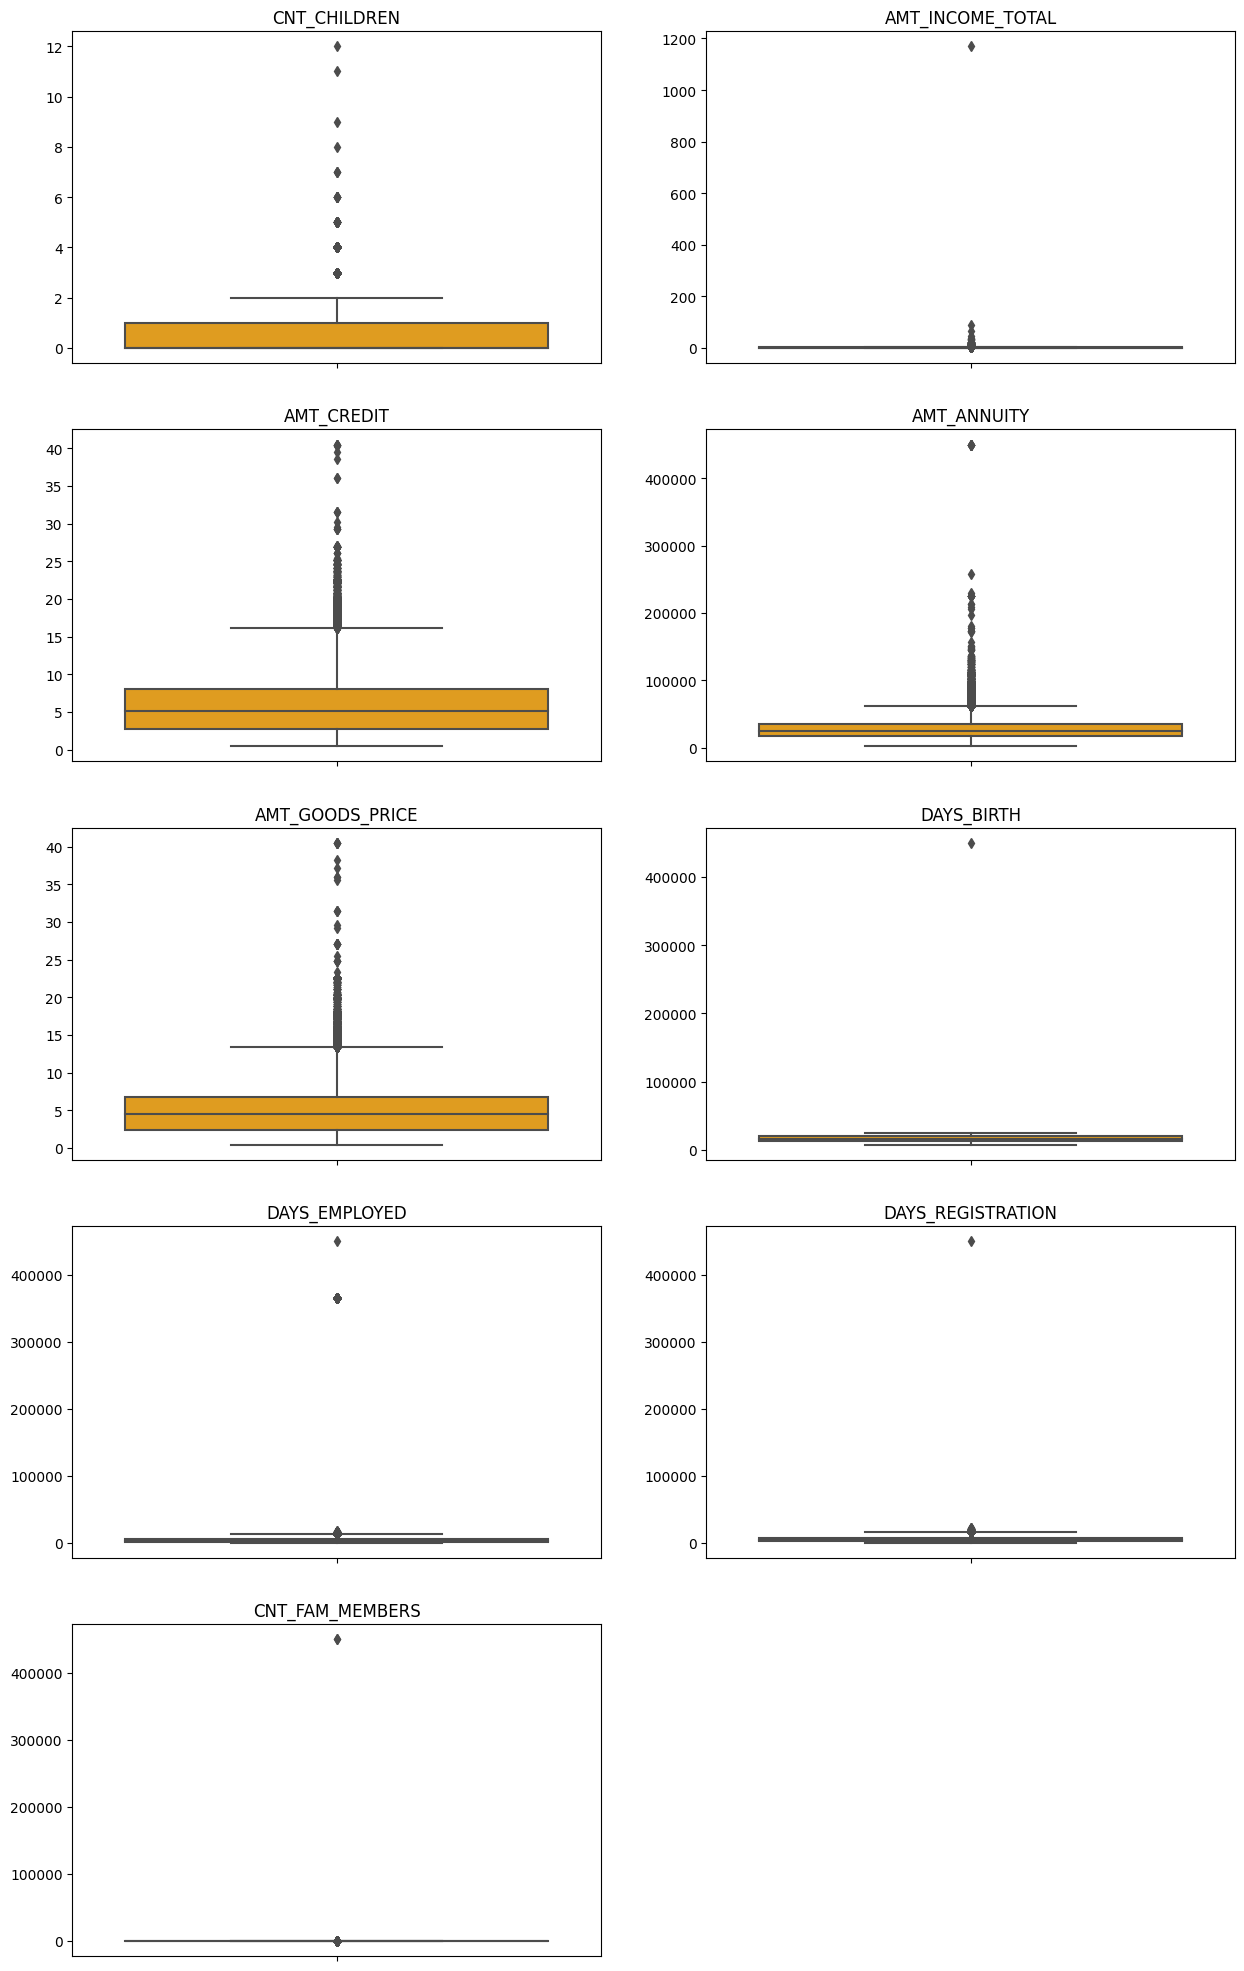

In [91]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(5,2,j+1)
    sns.boxplot(y = apd[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [92]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    apd[col] = pd.Categorical(apd[col])

In [93]:
#data set 2- previous application


In [94]:
print("Previous Application:", pra.shape)

Previous Application: (292426, 37)


In [95]:
nullval(pra)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              52.09
AMT_DOWN_PAYMENT               52.09
NAME_TYPE_SUITE                48.89
NFLAG_INSURED_ON_APPROVAL      39.35
DAYS_FIRST_DRAWING             39.35
DAYS_FIRST_DUE                 39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_LAST_DUE                  39.35
DAYS_TERMINATION               39.35
AMT_GOODS_PRICE                22.46
AMT_ANNUITY                    21.78
CNT_PAYMENT                    21.78
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PAYMENT_TYPE               0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

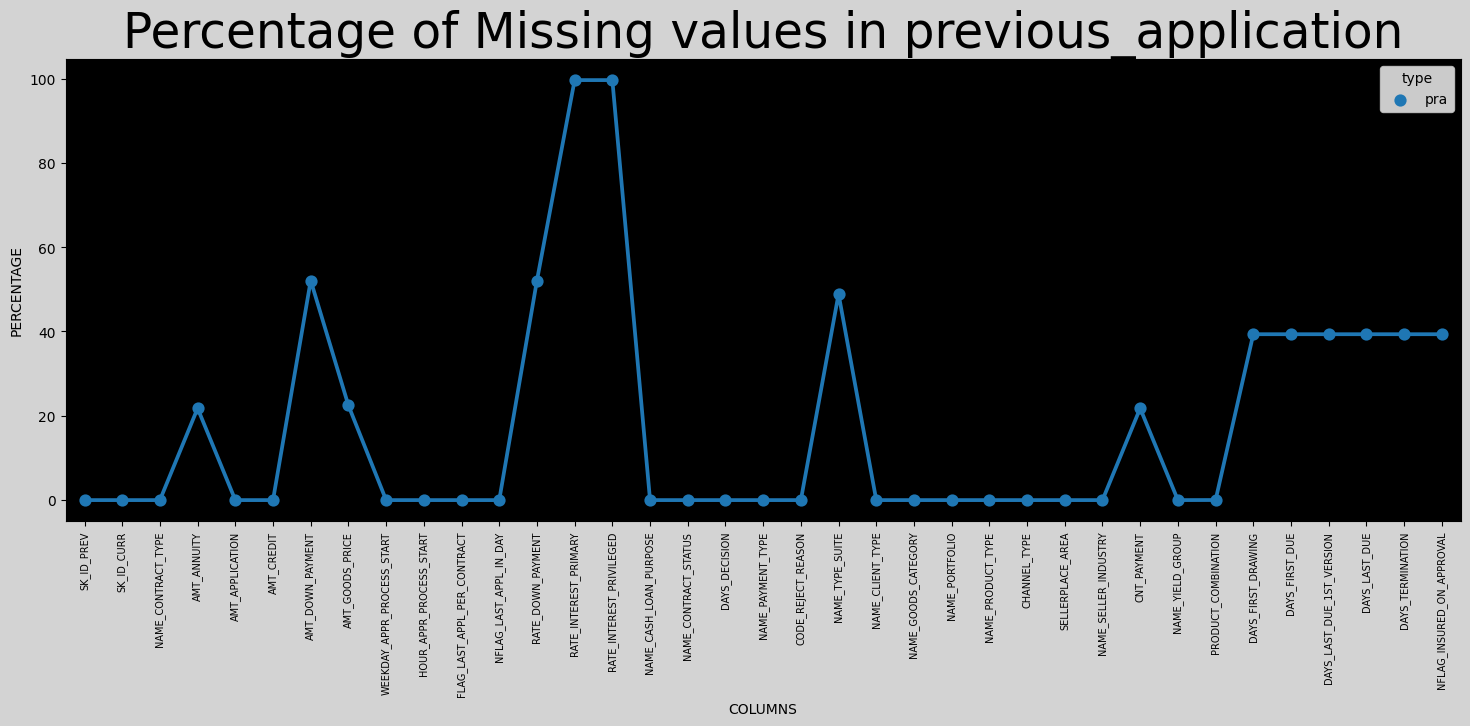

In [96]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((pra.isnull().sum())*100/pra.shape[0]).reset_index()
    miss_data["type"] = "pra"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in previous_application",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [97]:
pnullcol50=nullval(pra)[nullval(pra)>50]

In [98]:
pnullcol50

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
RATE_DOWN_PAYMENT           52.09
AMT_DOWN_PAYMENT            52.09
dtype: float64

In [99]:
pra.drop(columns=pnullcol50.index,inplace=True)

In [101]:
pra.shape

(292426, 33)

In [102]:
pnullcol15=nullval(pra)[nullval(pra)>15] #null values greater than 15%

In [103]:
pnullcol15 #columns with null value greater than 15%

NAME_TYPE_SUITE              48.89
DAYS_FIRST_DRAWING           39.35
DAYS_TERMINATION             39.35
DAYS_LAST_DUE                39.35
DAYS_LAST_DUE_1ST_VERSION    39.35
DAYS_FIRST_DUE               39.35
NFLAG_INSURED_ON_APPROVAL    39.35
AMT_GOODS_PRICE              22.46
AMT_ANNUITY                  21.78
CNT_PAYMENT                  21.78
dtype: float64

In [104]:
# Listing down columns which are not needed

Unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY']
#pra.drop(Unnecessary_col,axis =1, inplace = True)

pra.shape

(292426, 33)

In [105]:
# IMputing values "Unknown" as this a categorical column
pra["NAME_TYPE_SUITE"] = pra["NAME_TYPE_SUITE"].fillna("Unknown")

pra["NAME_TYPE_SUITE"].value_counts(normalize=True)*100

Unknown            48.885530
Unaccompanied      30.182337
Family             13.101092
Spouse, partner     4.069406
Children            1.974175
Other_B             1.101133
Other_A             0.552618
Group of people     0.133709
Name: NAME_TYPE_SUITE, dtype: float64

In [106]:
nullval(pra)

NFLAG_INSURED_ON_APPROVAL      39.35
DAYS_TERMINATION               39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
DAYS_LAST_DUE                  39.35
AMT_GOODS_PRICE                22.46
AMT_ANNUITY                    21.78
CNT_PAYMENT                    21.78
PRODUCT_COMBINATION             0.02
NAME_PORTFOLIO                  0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_GOODS_CATEGORY             0.00
WEEKDAY_APPR_PROCESS_START      0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
AMT_CREDIT                      0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
N

In [107]:
pra['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    119467
1.0     57877
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [108]:
pra['NFLAG_INSURED_ON_APPROVAL']=pra['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

In [109]:
nullval(pra)

DAYS_LAST_DUE                  39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
DAYS_TERMINATION               39.35
AMT_GOODS_PRICE                22.46
AMT_ANNUITY                    21.78
CNT_PAYMENT                    21.78
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
A

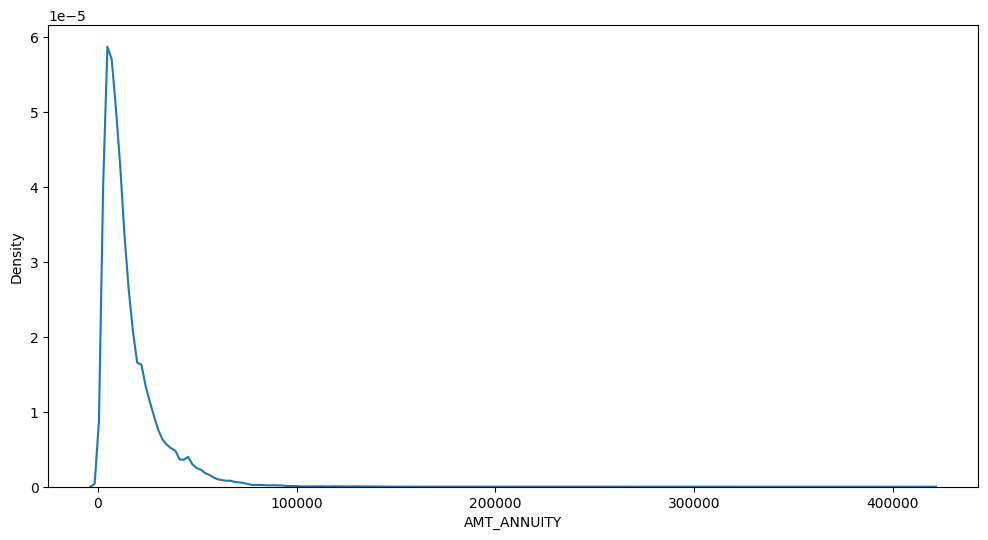

In [110]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(pra['AMT_ANNUITY'])
plt.show()

In [111]:
#imputing missing values with median as there is only 1 peak implying outliers

pra['AMT_ANNUITY'].fillna(pra['AMT_ANNUITY'].median(),inplace = True)

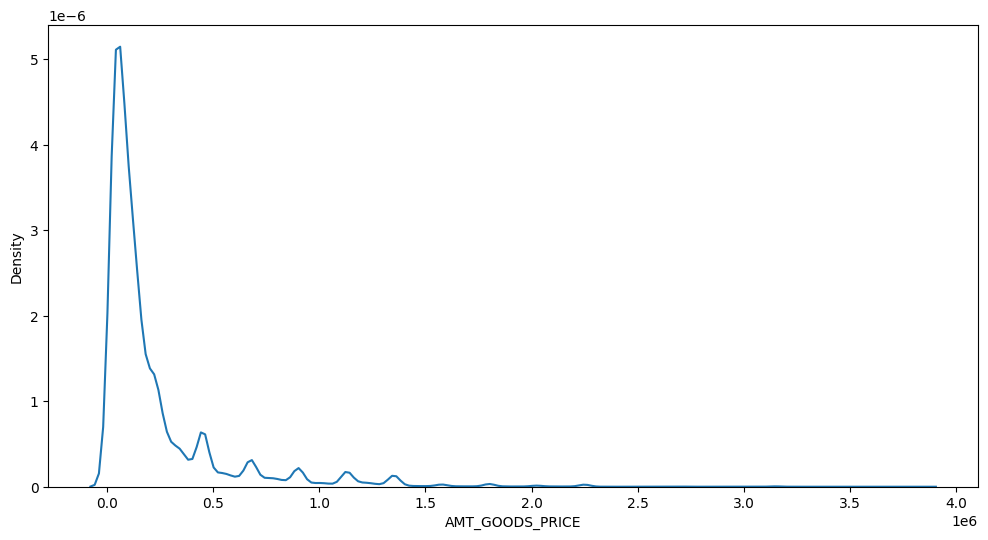

In [112]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(pra['AMT_GOODS_PRICE'])
plt.show()

<ipython-input-113-4b4df72c5e2d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pra['AMT_GOODS_PRICE'][pd.notnull(pra['AMT_GOODS_PRICE'])]);
<ipython-input-113-4b4df72c5e2d>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(statsDF[i[1]])
<ipython-input-113-4b4df72c5e2d>:16: UserWarning: 

`d

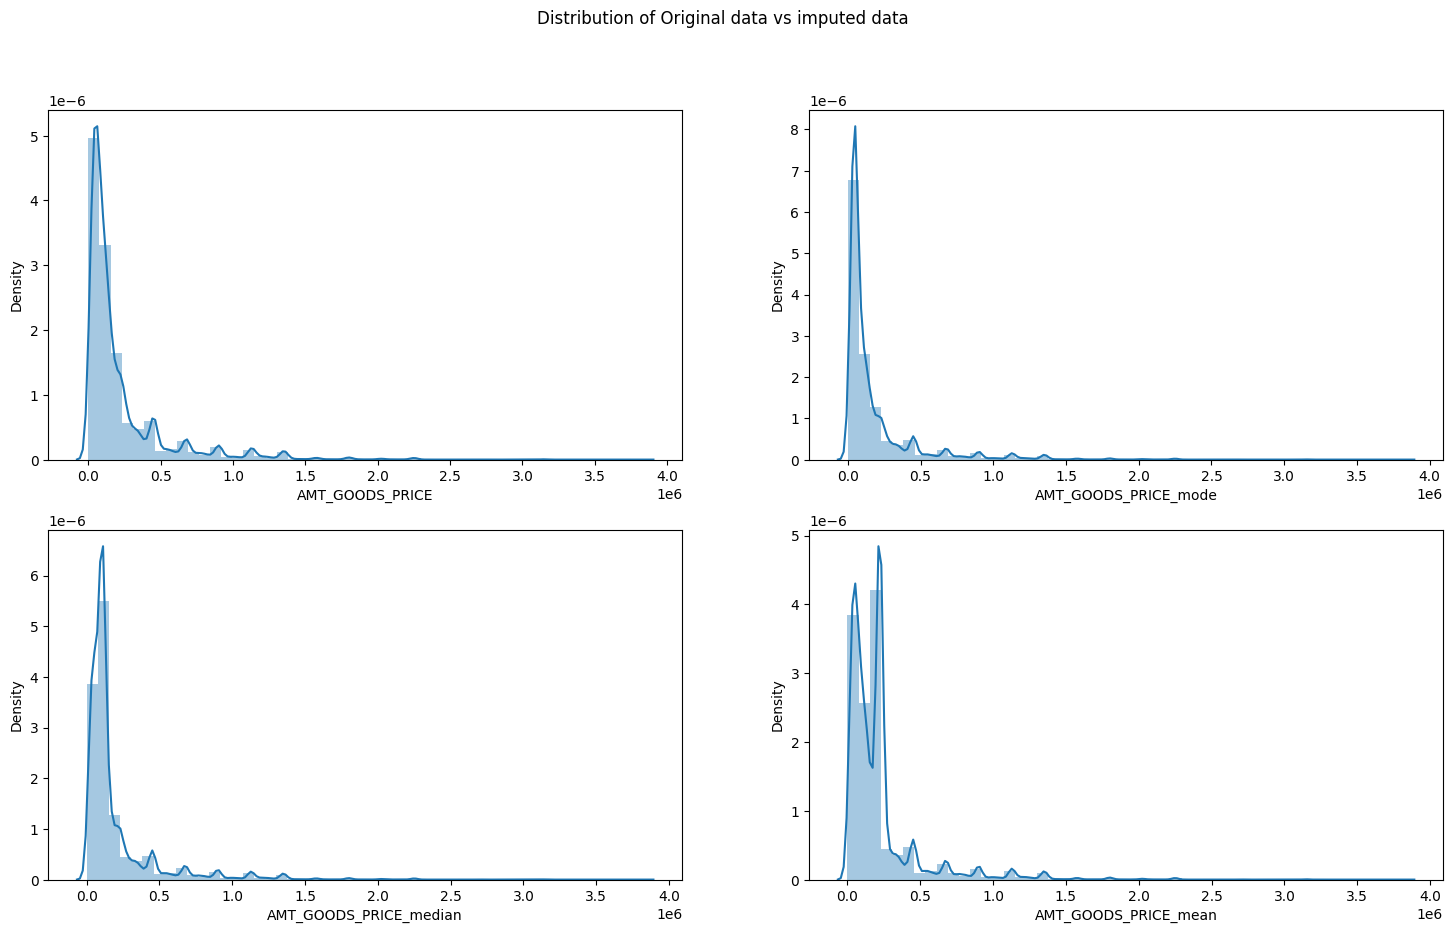

In [113]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame()
statsDF['AMT_GOODS_PRICE_mode'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(pra['AMT_GOODS_PRICE'][pd.notnull(pra['AMT_GOODS_PRICE'])]);
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

In [114]:
# Imputing null values with mode

pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [115]:
nullval(pra)

DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
DAYS_TERMINATION               39.35
DAYS_LAST_DUE                  39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
CNT_PAYMENT                    21.78
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
N

In [116]:
pra['CNT_PAYMENT'].describe()

count    228732.000000
mean         15.782536
std          14.305982
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [117]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.
pra.loc[pra['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        51990
Refused          7087
Unused offer     4614
Approved            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [118]:
#imputing null values as 0
pra['CNT_PAYMENT'].fillna(0,inplace = True)

In [119]:
pra['PRODUCT_COMBINATION'].describe()

count     292371
unique        17
top         Cash
freq       48647
Name: PRODUCT_COMBINATION, dtype: object

In [120]:
pra['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

Cash                              16.638791
POS household with interest       16.432546
POS mobile with interest          13.720239
Cash X-Sell: middle                8.308964
Cash X-Sell: low                   7.459700
Card Street                        6.688420
POS industry with interest         6.126463
POS household without interest     5.130126
Card X-Sell                        4.731659
Cash Street: high                  3.476063
Cash X-Sell: high                  3.414497
Cash Street: middle                2.029613
Cash Street: low                   1.974888
POS other with interest            1.471418
POS mobile without interest        1.463209
POS industry without interest      0.767518
POS others without interest        0.165885
Name: PRODUCT_COMBINATION, dtype: float64

In [121]:
pra['PRODUCT_COMBINATION'].isnull().sum()

55

In [122]:
pra['PRODUCT_COMBINATION']=pra['PRODUCT_COMBINATION'].fillna("Unkown")
pra['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

Cash                              16.635662
POS household with interest       16.429456
POS mobile with interest          13.717658
Cash X-Sell: middle                8.307401
Cash X-Sell: low                   7.458297
Card Street                        6.687162
POS industry with interest         6.125310
POS household without interest     5.129161
Card X-Sell                        4.730769
Cash Street: high                  3.475409
Cash X-Sell: high                  3.413855
Cash Street: middle                2.029231
Cash Street: low                   1.974517
POS other with interest            1.471141
POS mobile without interest        1.462934
POS industry without interest      0.767374
POS others without interest        0.165854
Unkown                             0.018808
Name: PRODUCT_COMBINATION, dtype: float64

In [123]:
nullval(pra)

DAYS_FIRST_DUE                 39.35
DAYS_TERMINATION               39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_LAST_DUE                  39.35
DAYS_FIRST_DRAWING             39.35
CODE_REJECT_REASON              0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_PREV                      0.00
N

In [124]:
pra.shape

(292426, 33)

In [125]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

pra[p_days_col].describe() # Analysis before conversion

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  292425.000000       177344.000000   177344.000000   
mean     -891.572352       342867.348695    13817.355789   
std       785.009353        87721.109914    72437.750283   
min     -2922.000000        -2920.000000    -2892.000000   
25%     -1328.000000       365243.000000    -1647.000000   
50%      -590.000000       365243.000000     -834.000000   
75%      -284.000000       365243.000000     -409.000000   
max        -2.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              177344.000000  177344.000000     177344.000000  
mean                32957.293356   76070.317005      81350.247626  
std                105739.560263  149293.136765     152890.138530  
min                 -2801.000000   -2888.000000      -2847.000000  
25%                 -1266.000000   -1337.000000      -1292.000000  
50%                  -370.000000    -542.000000       -504.500000  
75%                   118.000000     -76.000000        -47.000000  
max                365243.000000  365243.000000     365243.000000

In [126]:
# Converting Negative days to positive days

pra[p_days_col] = abs(pra[p_days_col])

pra[p_days_col].describe() # analysing after conversion

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  292425.000000       177344.000000   177344.000000   
mean      891.572352       342993.034853    15950.904327   
std       785.009353        87228.375440    71998.022751   
min         2.000000            2.000000        2.000000   
25%       284.000000       365243.000000      474.000000   
50%       590.000000       365243.000000      927.000000   
75%      1328.000000       365243.000000     1844.000000   
max      2922.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              177344.000000  177344.000000     177344.000000  
mean                34372.109691   77656.158128      82879.764700  
std                105288.153789  148474.420506     152066.434282  
min                     0.000000       2.000000          2.000000  
25%                   256.000000     456.000000        449.000000  
50%                   746.000000    1168.000000       1184.000000  
75%                  1743.000000    2416.000000       2496.000000  
max                365243.000000  365243.000000     365243.000000

In [127]:
#days group calculation

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
pra['YEARLY_DECISION'] = pd.cut(pra['DAYS_DECISION'],bins,labels=slots)

In [128]:
nullval(pra)

DAYS_TERMINATION               39.35
DAYS_LAST_DUE                  39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
SK_ID_CURR                      0.00
YEARLY_DECISION                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_APPLICATION                 0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
NAME_PAYMENT_TYPE               0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
N

In [129]:
pra[p_days_col].mode()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0          210.0            365243.0        365243.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                   365243.0       365243.0          365243.0

<ipython-input-130-49c656895310>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pra[i][pd.notnull(pra[i])])
<ipython-input-130-49c656895310>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pra[i][pd.notnull(pra[i])])
<ipython-input-130-49c656895310>:4: UserWarning: 

`distplot` is a deprecate

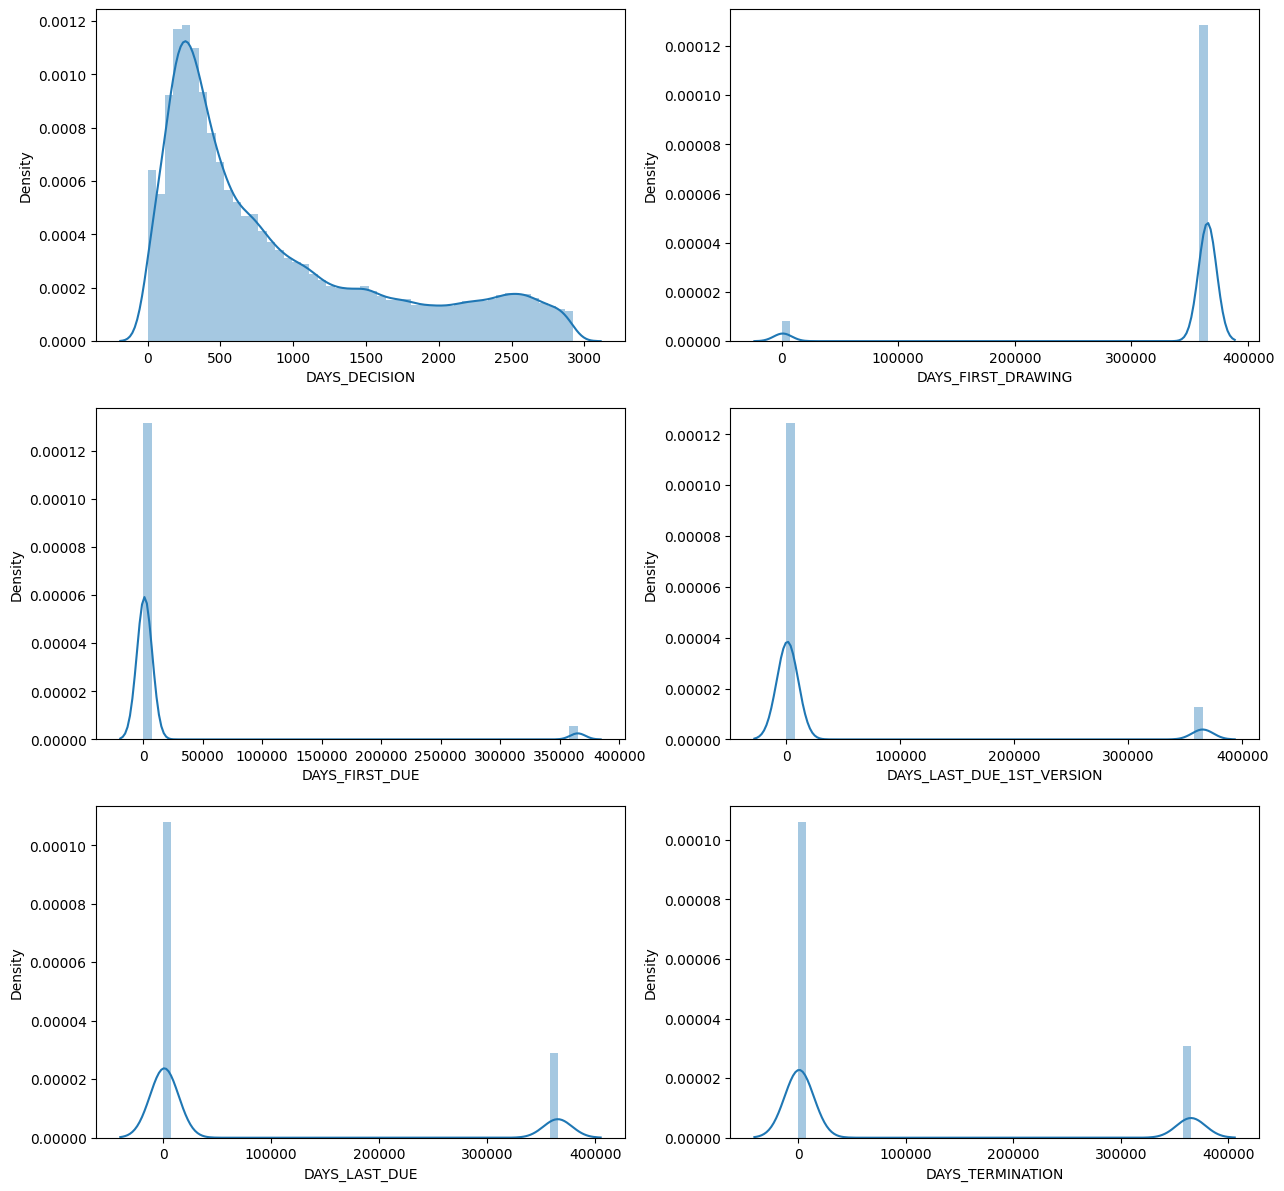

In [130]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_days_col, range(len(p_days_col))):
    plt.subplot(5,2,j+1)
    sns.distplot(pra[i][pd.notnull(pra[i])])


In [131]:
a=pd.DataFrame(pra[p_days_col])

In [132]:
nullval(a)

DAYS_FIRST_DRAWING           39.35
DAYS_FIRST_DUE               39.35
DAYS_LAST_DUE_1ST_VERSION    39.35
DAYS_LAST_DUE                39.35
DAYS_TERMINATION             39.35
DAYS_DECISION                 0.00
dtype: float64

In [133]:
for i in p_days_col:
    pra[i].fillna(pra[i].mode()[0],inplace=True)

In [134]:
nullval(a)

DAYS_FIRST_DRAWING           39.35
DAYS_FIRST_DUE               39.35
DAYS_LAST_DUE_1ST_VERSION    39.35
DAYS_LAST_DUE                39.35
DAYS_TERMINATION             39.35
DAYS_DECISION                 0.00
dtype: float64

In [135]:
pra[p_days_col]=a[p_days_col]

In [136]:
nullval(pra)

DAYS_TERMINATION               39.35
DAYS_LAST_DUE                  39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
SK_ID_CURR                      0.00
YEARLY_DECISION                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_APPLICATION                 0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
NAME_PAYMENT_TYPE               0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
N

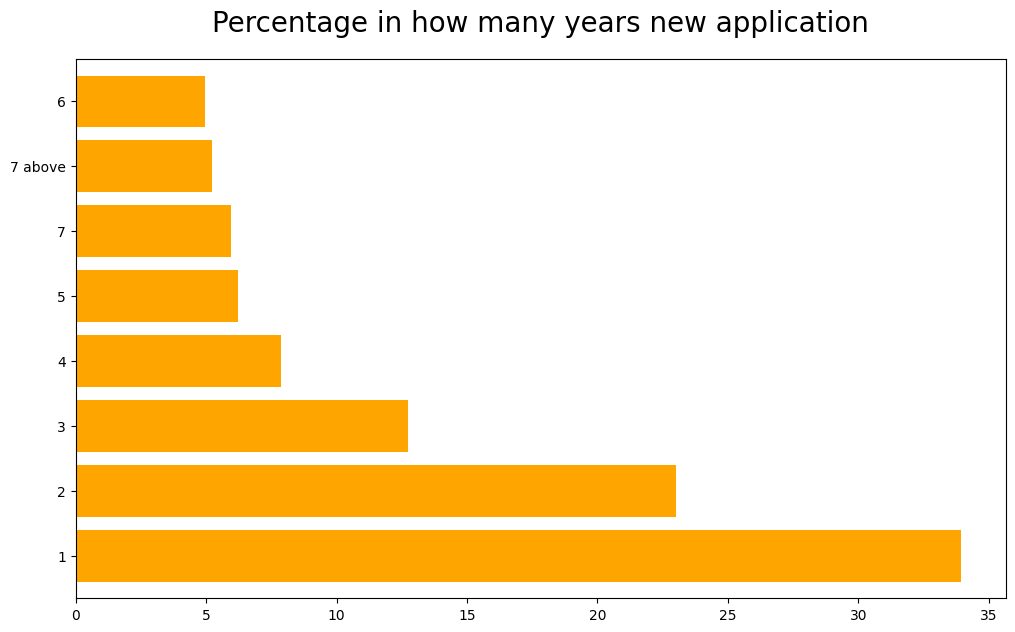

In [137]:
plt.figure(figsize = [12,7])
(pra['YEARLY_DECISION'].value_counts(normalize=True)*100).plot.barh(color= "orange",width = .8)
plt.title("Percentage in how many years new application", fontdict={"fontsize":20}, pad =20)
plt.show()

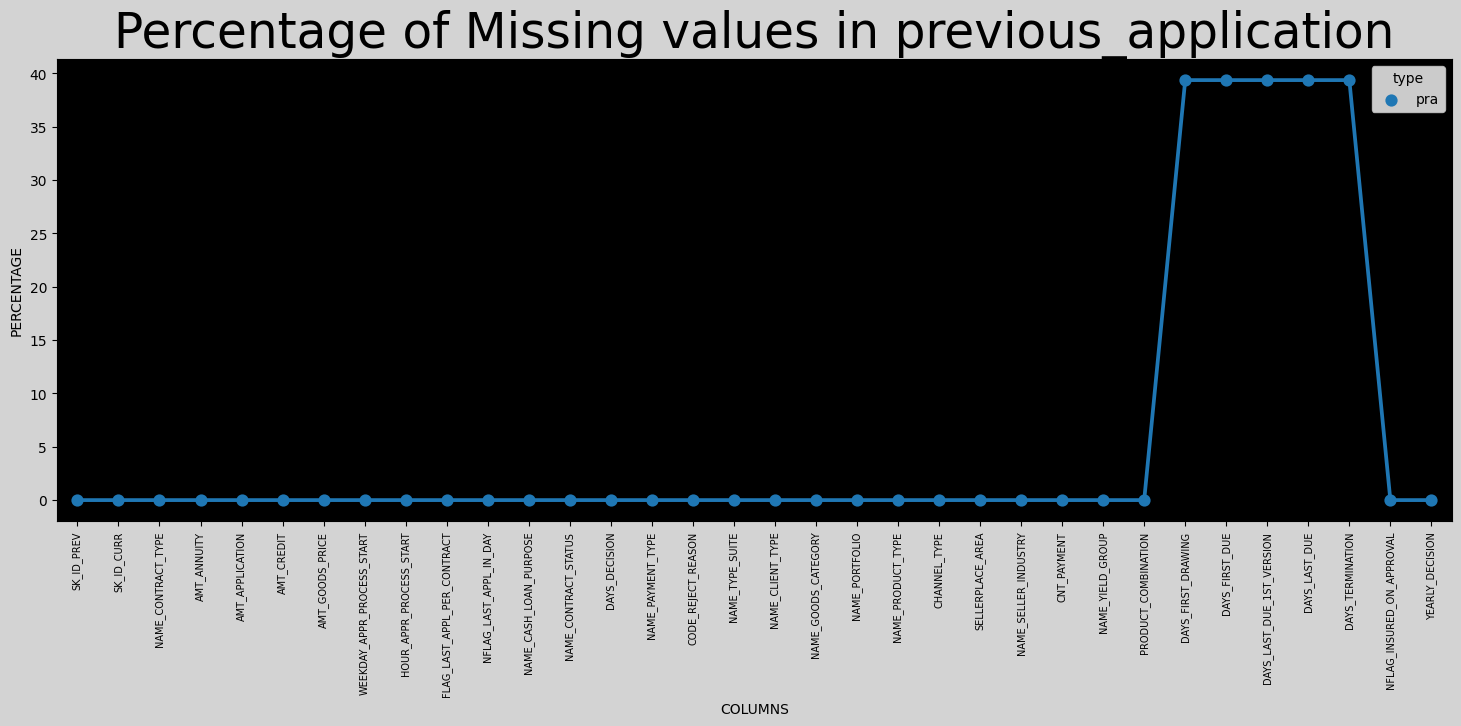

In [138]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((pra.isnull().sum())*100/pra.shape[0]).reset_index()
    miss_data["type"] = "pra"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in previous_application",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [139]:
nullval(pra)

DAYS_TERMINATION               39.35
DAYS_LAST_DUE                  39.35
DAYS_LAST_DUE_1ST_VERSION      39.35
DAYS_FIRST_DUE                 39.35
DAYS_FIRST_DRAWING             39.35
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
SK_ID_CURR                      0.00
YEARLY_DECISION                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_APPLICATION                 0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
NAME_PAYMENT_TYPE               0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
N

In [140]:
pra['AMT_CREDIT'].isnull().sum()

1

In [141]:
pra['AMT_CREDIT'].fillna(pra['AMT_CREDIT'].median(),inplace=True)

In [142]:
apd.shape

(131974, 78)

In [143]:
pra.shape

(292426, 34)

In [144]:
#outlier identification
pra.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  2.924260e+05  292425.000000  292426.000000     2.924250e+05   
mean   1.920997e+06  278493.178535   14663.049667     1.714640e+05   
std    5.333491e+05  102821.720176   13074.230002     2.871346e+05   
min    2.178270e+05  100001.000000       0.000000     0.000000e+00   
25%    1.458836e+06  189495.000000    7352.820000     2.011500e+04   
50%    1.921166e+06  278684.000000   11063.880000     7.060050e+04   
75%    2.382478e+06  367825.000000   16483.331250     1.800000e+05   
max    2.845382e+06  456255.000000  417927.645000     3.826372e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  2.924260e+05     2.924260e+05            292425.000000   
mean   1.915234e+05     1.816025e+05                12.492304   
std    3.129289e+05     2.816926e+05                 3.328820   
min    0.000000e+00     0.000000e+00                 0.000000   
25%    2.479950e+04     4.500000e+04                10.000000   
50%    7.917750e+04     7.060500e+04                12.000000   
75%    2.037600e+05     1.800000e+05                15.000000   
max    4.104351e+06     3.826372e+06                23.000000   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  \
count           292425.000000  292425.000000      2.924250e+05  292426.000000   
mean                 0.996457     891.572352      3.352940e+02      12.344904   
std                  0.059416     785.009353      1.059097e+04      14.230974   
min                  0.000000       2.000000     -1.000000e+00       0.000000   
25%                  1.000000     284.000000     -1.000000e+00       0.000000   
50%                  1.000000     590.000000      5.000000e+00      10.000000   
75%                  1.000000    1328.000000      9.600000e+01      14.000000   
max                  1.000000    2922.000000      4.000000e+06      84.000000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       177344.000000   177344.000000              177344.000000   
mean        342993.034853    15950.904327               34372.109691   
std          87228.375440    71998.022751              105288.153789   
min              2.000000        2.000000                   0.000000   
25%         365243.000000      474.000000                 256.000000   
50%         365243.000000      927.000000                 746.000000   
75%         365243.000000     1844.000000                1743.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  177344.000000     177344.000000              292426.000000  
mean    77656.158128      82879.764700                   0.197920  
std    148474.420506     152066.434282                   0.398432  
min         2.000000          2.000000                   0.000000  
25%       456.000000        449.000000                   0.000000  
50%      1168.000000       1184.000000                   0.000000  
75%      2416.000000       2496.000000                   0.000000  
max    365243.000000     365243.000000                   1.000000

In [145]:
#from describe we could find all the columns those wo have high difference between max and 75 percentile
#and the ones which makes no sense having max value to be so high are captured below


In [146]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/

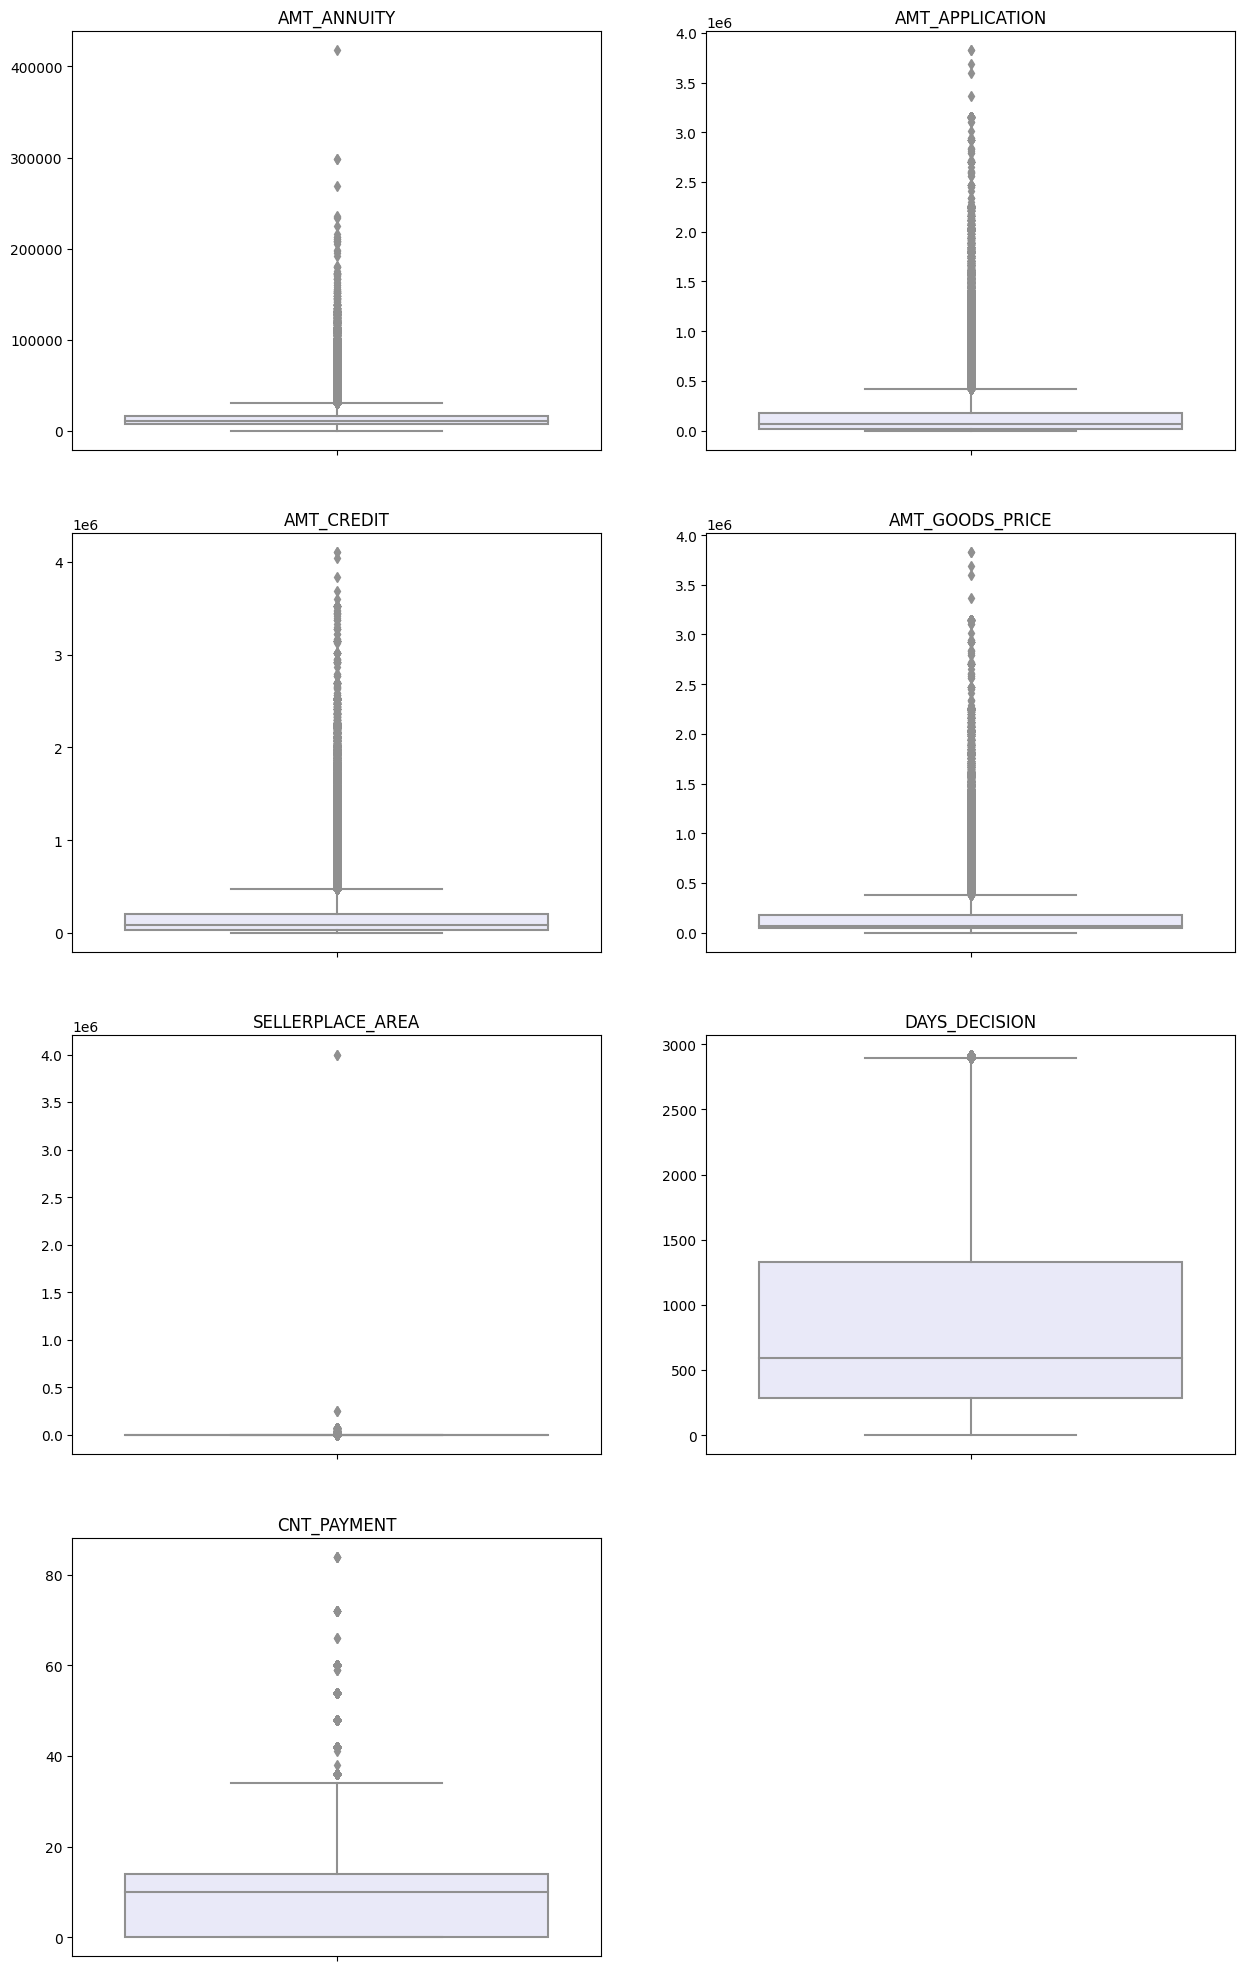

In [147]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = pra[i], orient = "h", color = "lavender")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

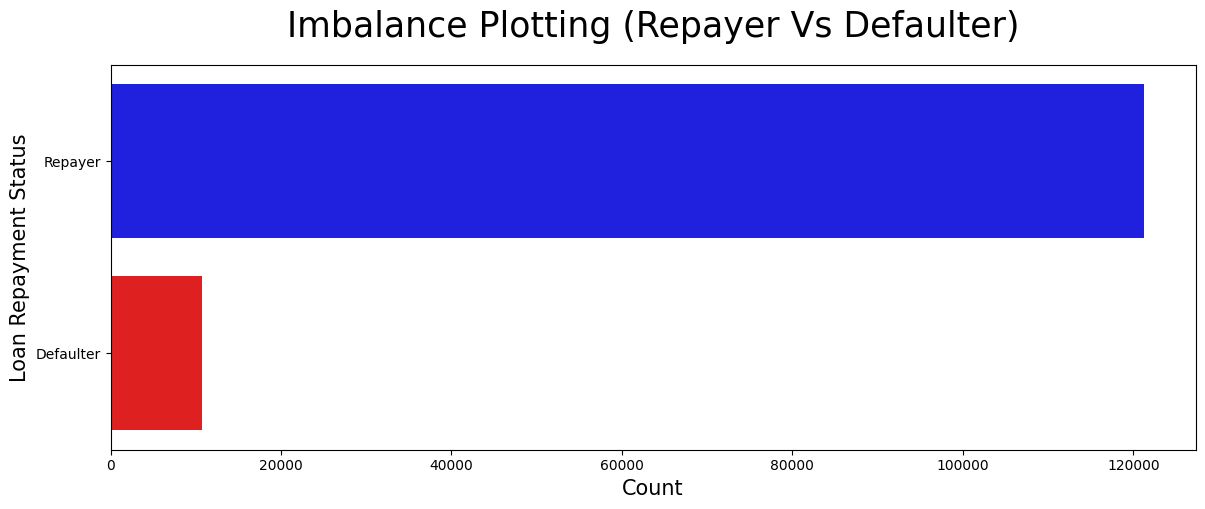

In [148]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = apd["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [149]:
a=apd['TARGET'].value_counts()
print( "No. of reapyers are ",a[0])
print("No. of defaulters are ",a[1])

No. of reapyers are  121242
No. of defaulters are  10732


In [150]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below
repayer = round((apd["TARGET"].value_counts()[0]/len(apd)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((apd["TARGET"].value_counts()[1]/len(apd)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.87%
Defaulter Percentage is 8.13%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.30/1 (approx)


In [151]:
# Creating a function to find if the column is categorical or numerical

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"

# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)


    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})


        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)


# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))


# 1. Subplot 1: Count plot of the column

        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)

# 2. Subplot 2: Percentage of defaulters within the column

        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)


# If the plot is not readable, use the log scale

        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})


        plt.show()


In [152]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)
    plt.ylabel(y,fontsize = 15)
    plt.title(x+" & "+y+" BIVARAITE ANALYSIS" ,fontsize = 20)
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [153]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)


    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)
    else:
        plt.ylabel("Count",fontsize=15)

    plt.title(col , fontsize=20)
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')

    plt.show()


In [154]:
# Function to plot point plots

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [155]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(apd.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(apd.select_dtypes(["int","float"]).columns)  #N Numerical Column list

In [156]:
#CATEGORICAL SEGMENTED UNIVARAITE ANALYSIS

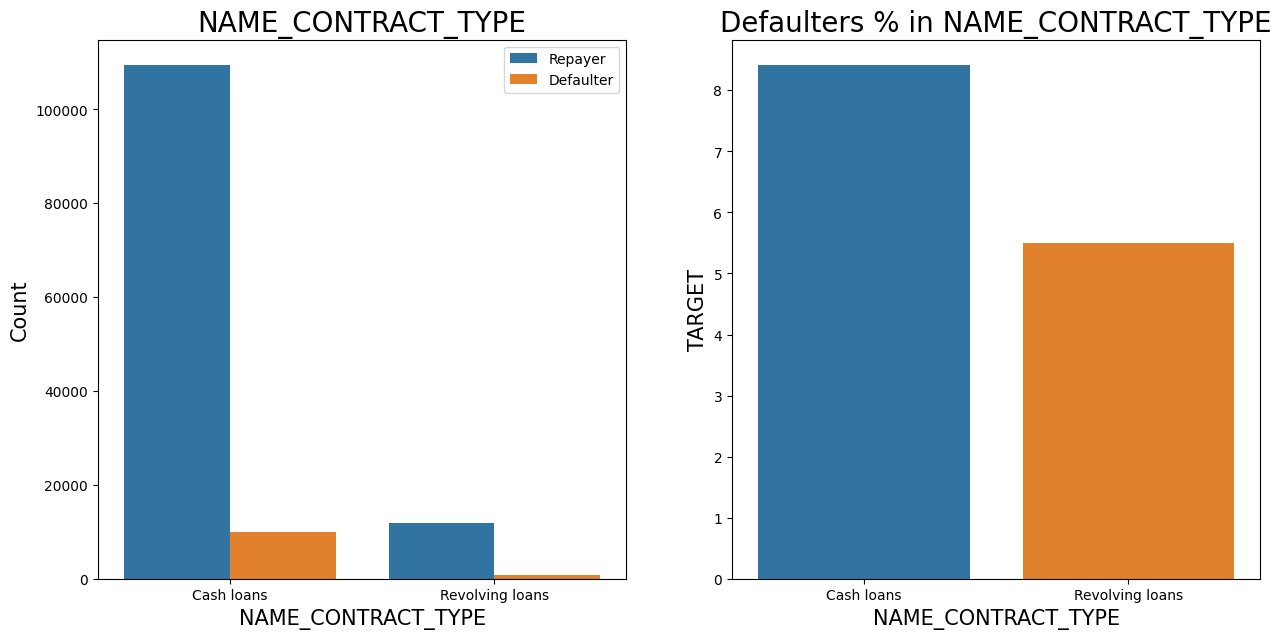

In [157]:
univariate(apd,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

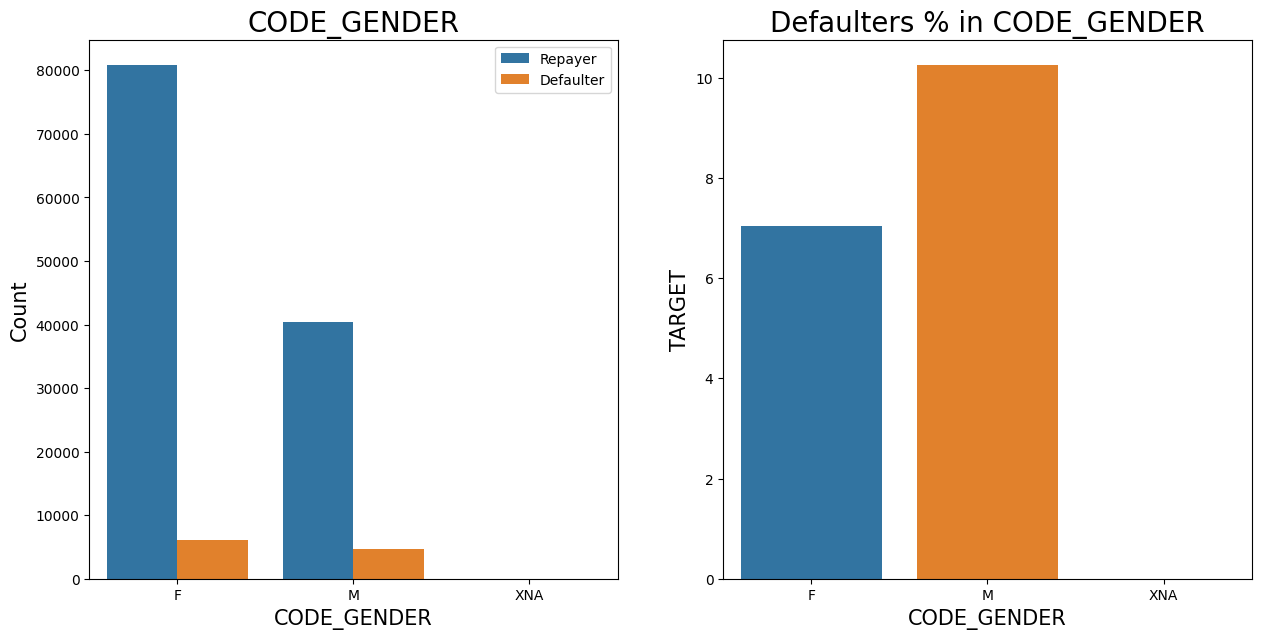

In [158]:
#2 Checking the type of Gender on loan repayment status
univariate(apd,"CODE_GENDER","TARGET",False,False,True)

In [159]:
apd.loc[:,['CODE_GENDER',"TARGET"]].value_counts()

CODE_GENDER  TARGET
F            0         80786
M            0         40453
F            1          6113
M            1          4619
XNA          0             3
dtype: int64

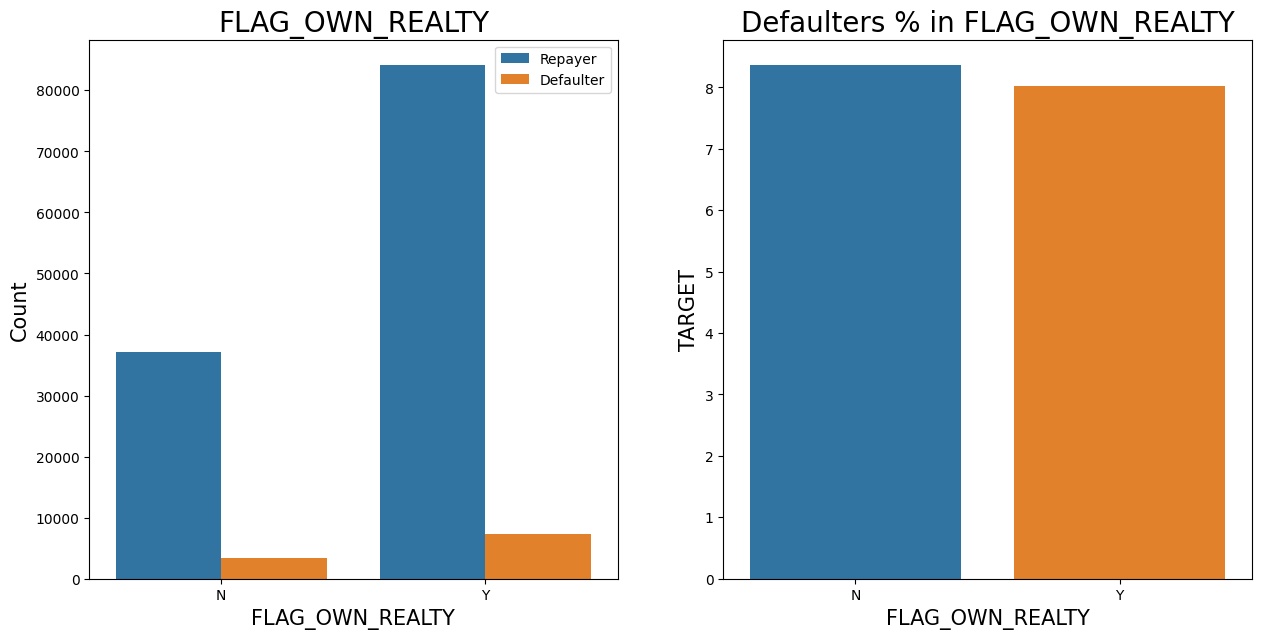

In [160]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(apd,"FLAG_OWN_REALTY","TARGET",False,False,True)

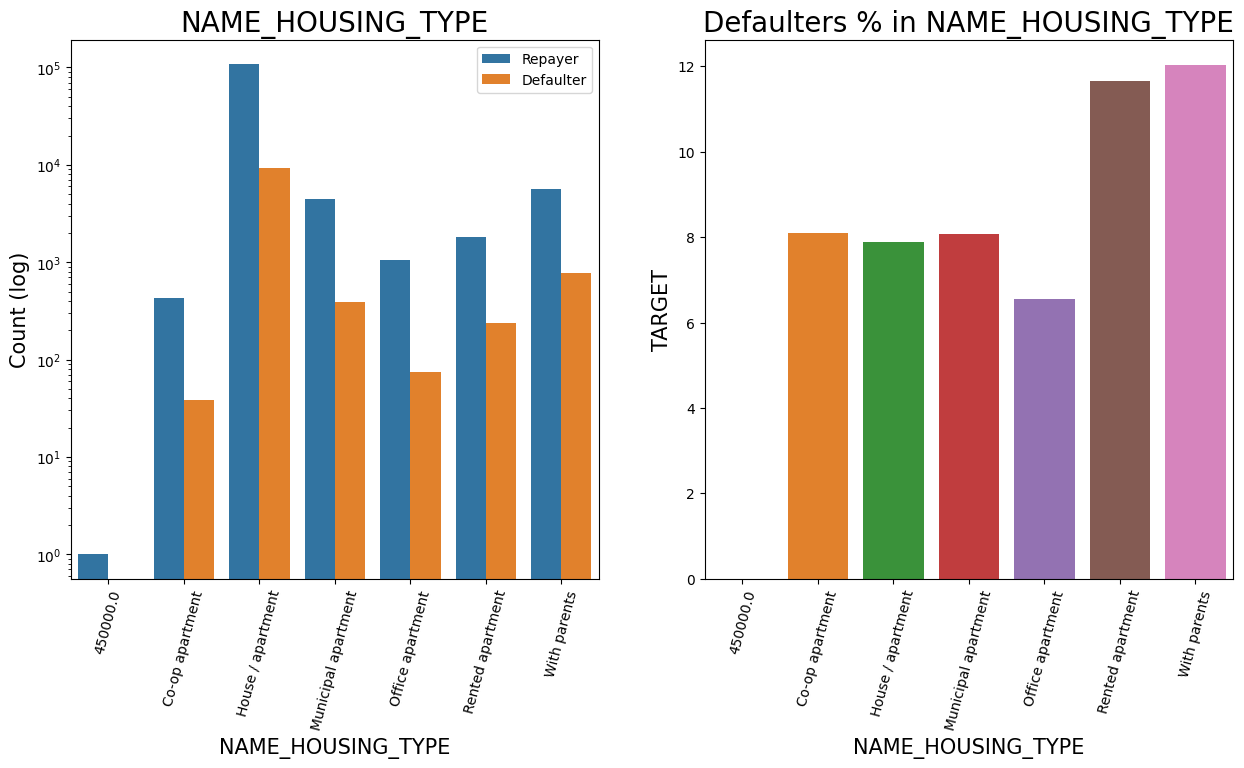

In [161]:
#4 Analyzing Housing Type based on loan repayment status
univariate(apd,"NAME_HOUSING_TYPE","TARGET",True,True,True)

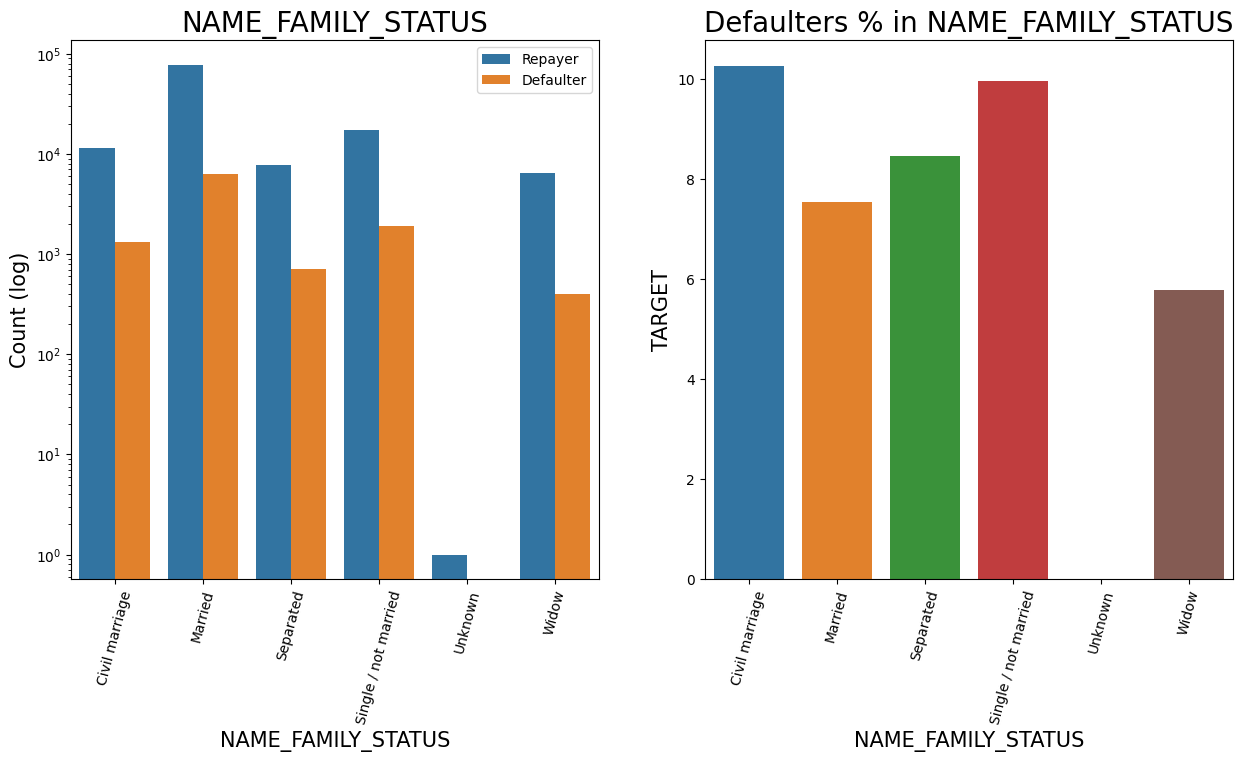

In [162]:
#5 Analyzing Family status based on loan repayment status
univariate(apd,"NAME_FAMILY_STATUS","TARGET",True,True,True)

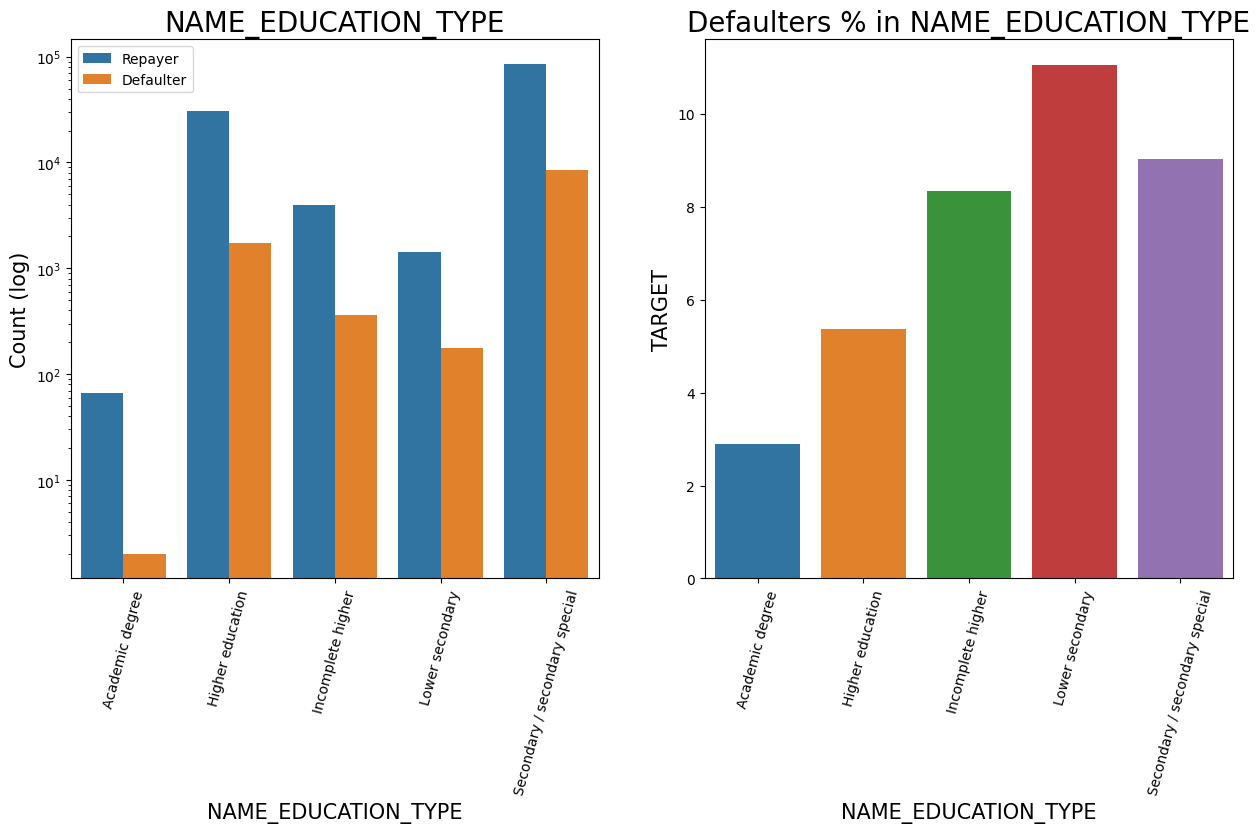

In [163]:
#6 Analyzing Education Type based on loan repayment status
univariate(apd,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

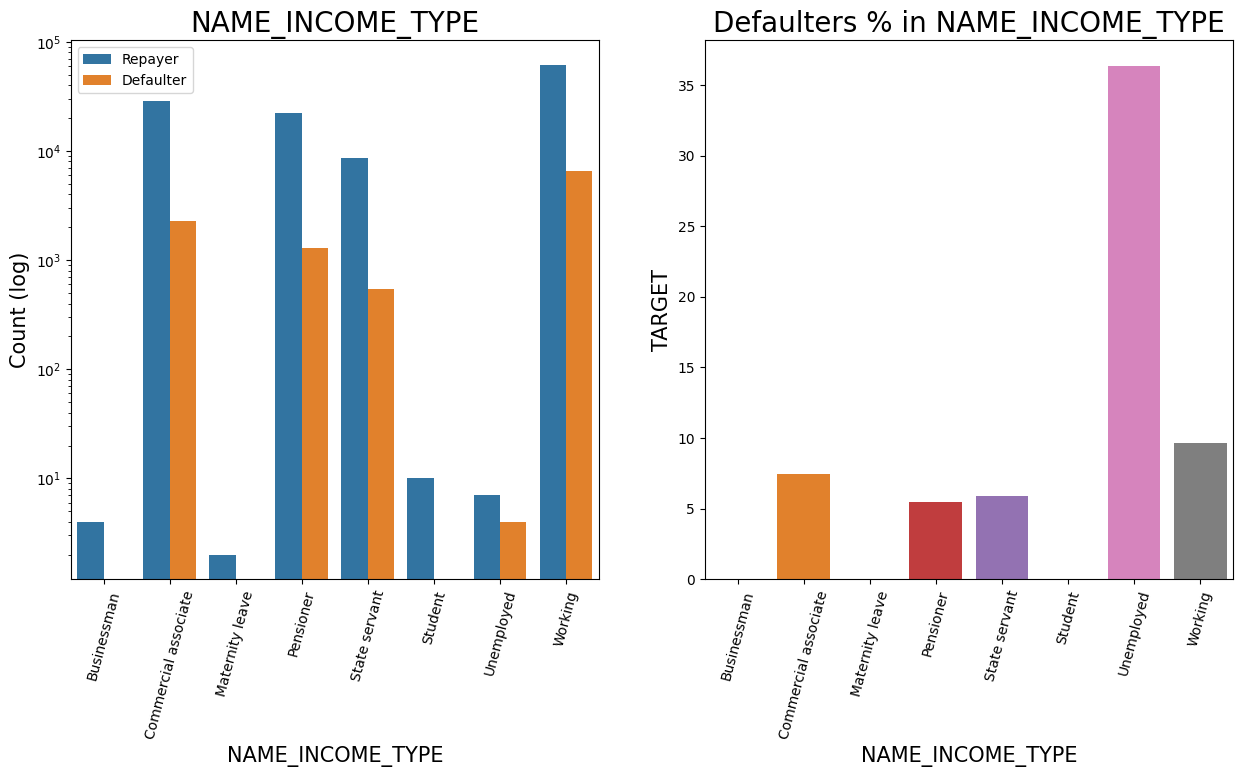

In [164]:
#7 Analyzing Income Type based on loan repayment status
univariate(apd,"NAME_INCOME_TYPE","TARGET",True,True,True)

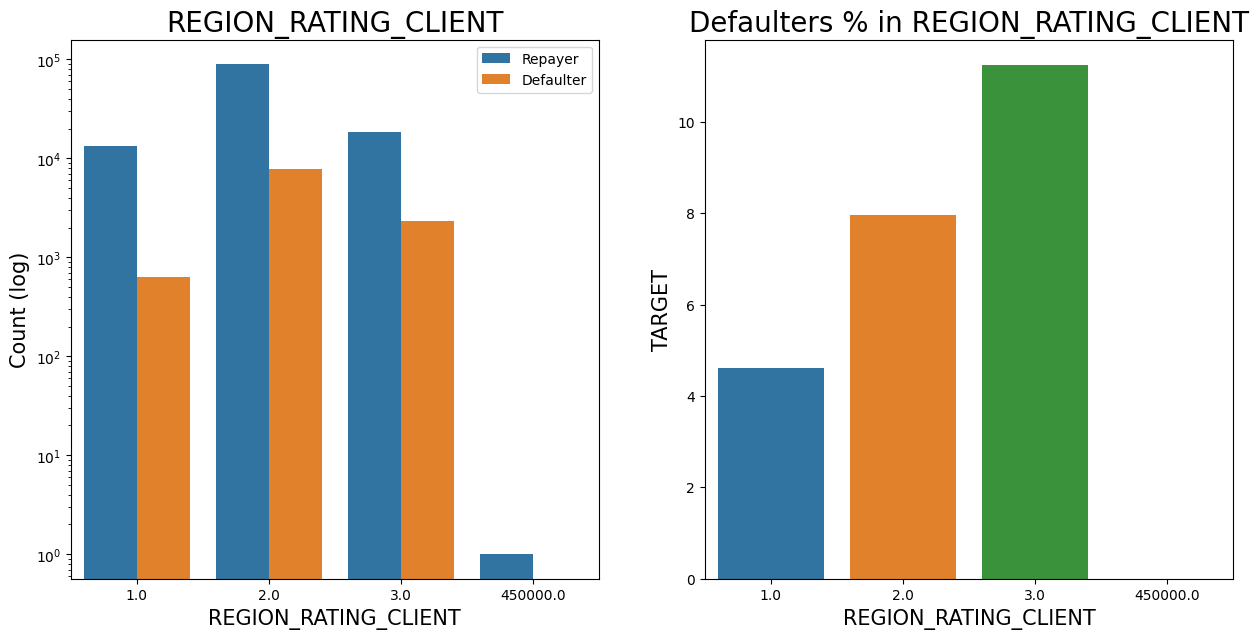

In [165]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(apd,"REGION_RATING_CLIENT","TARGET",True,False,True)

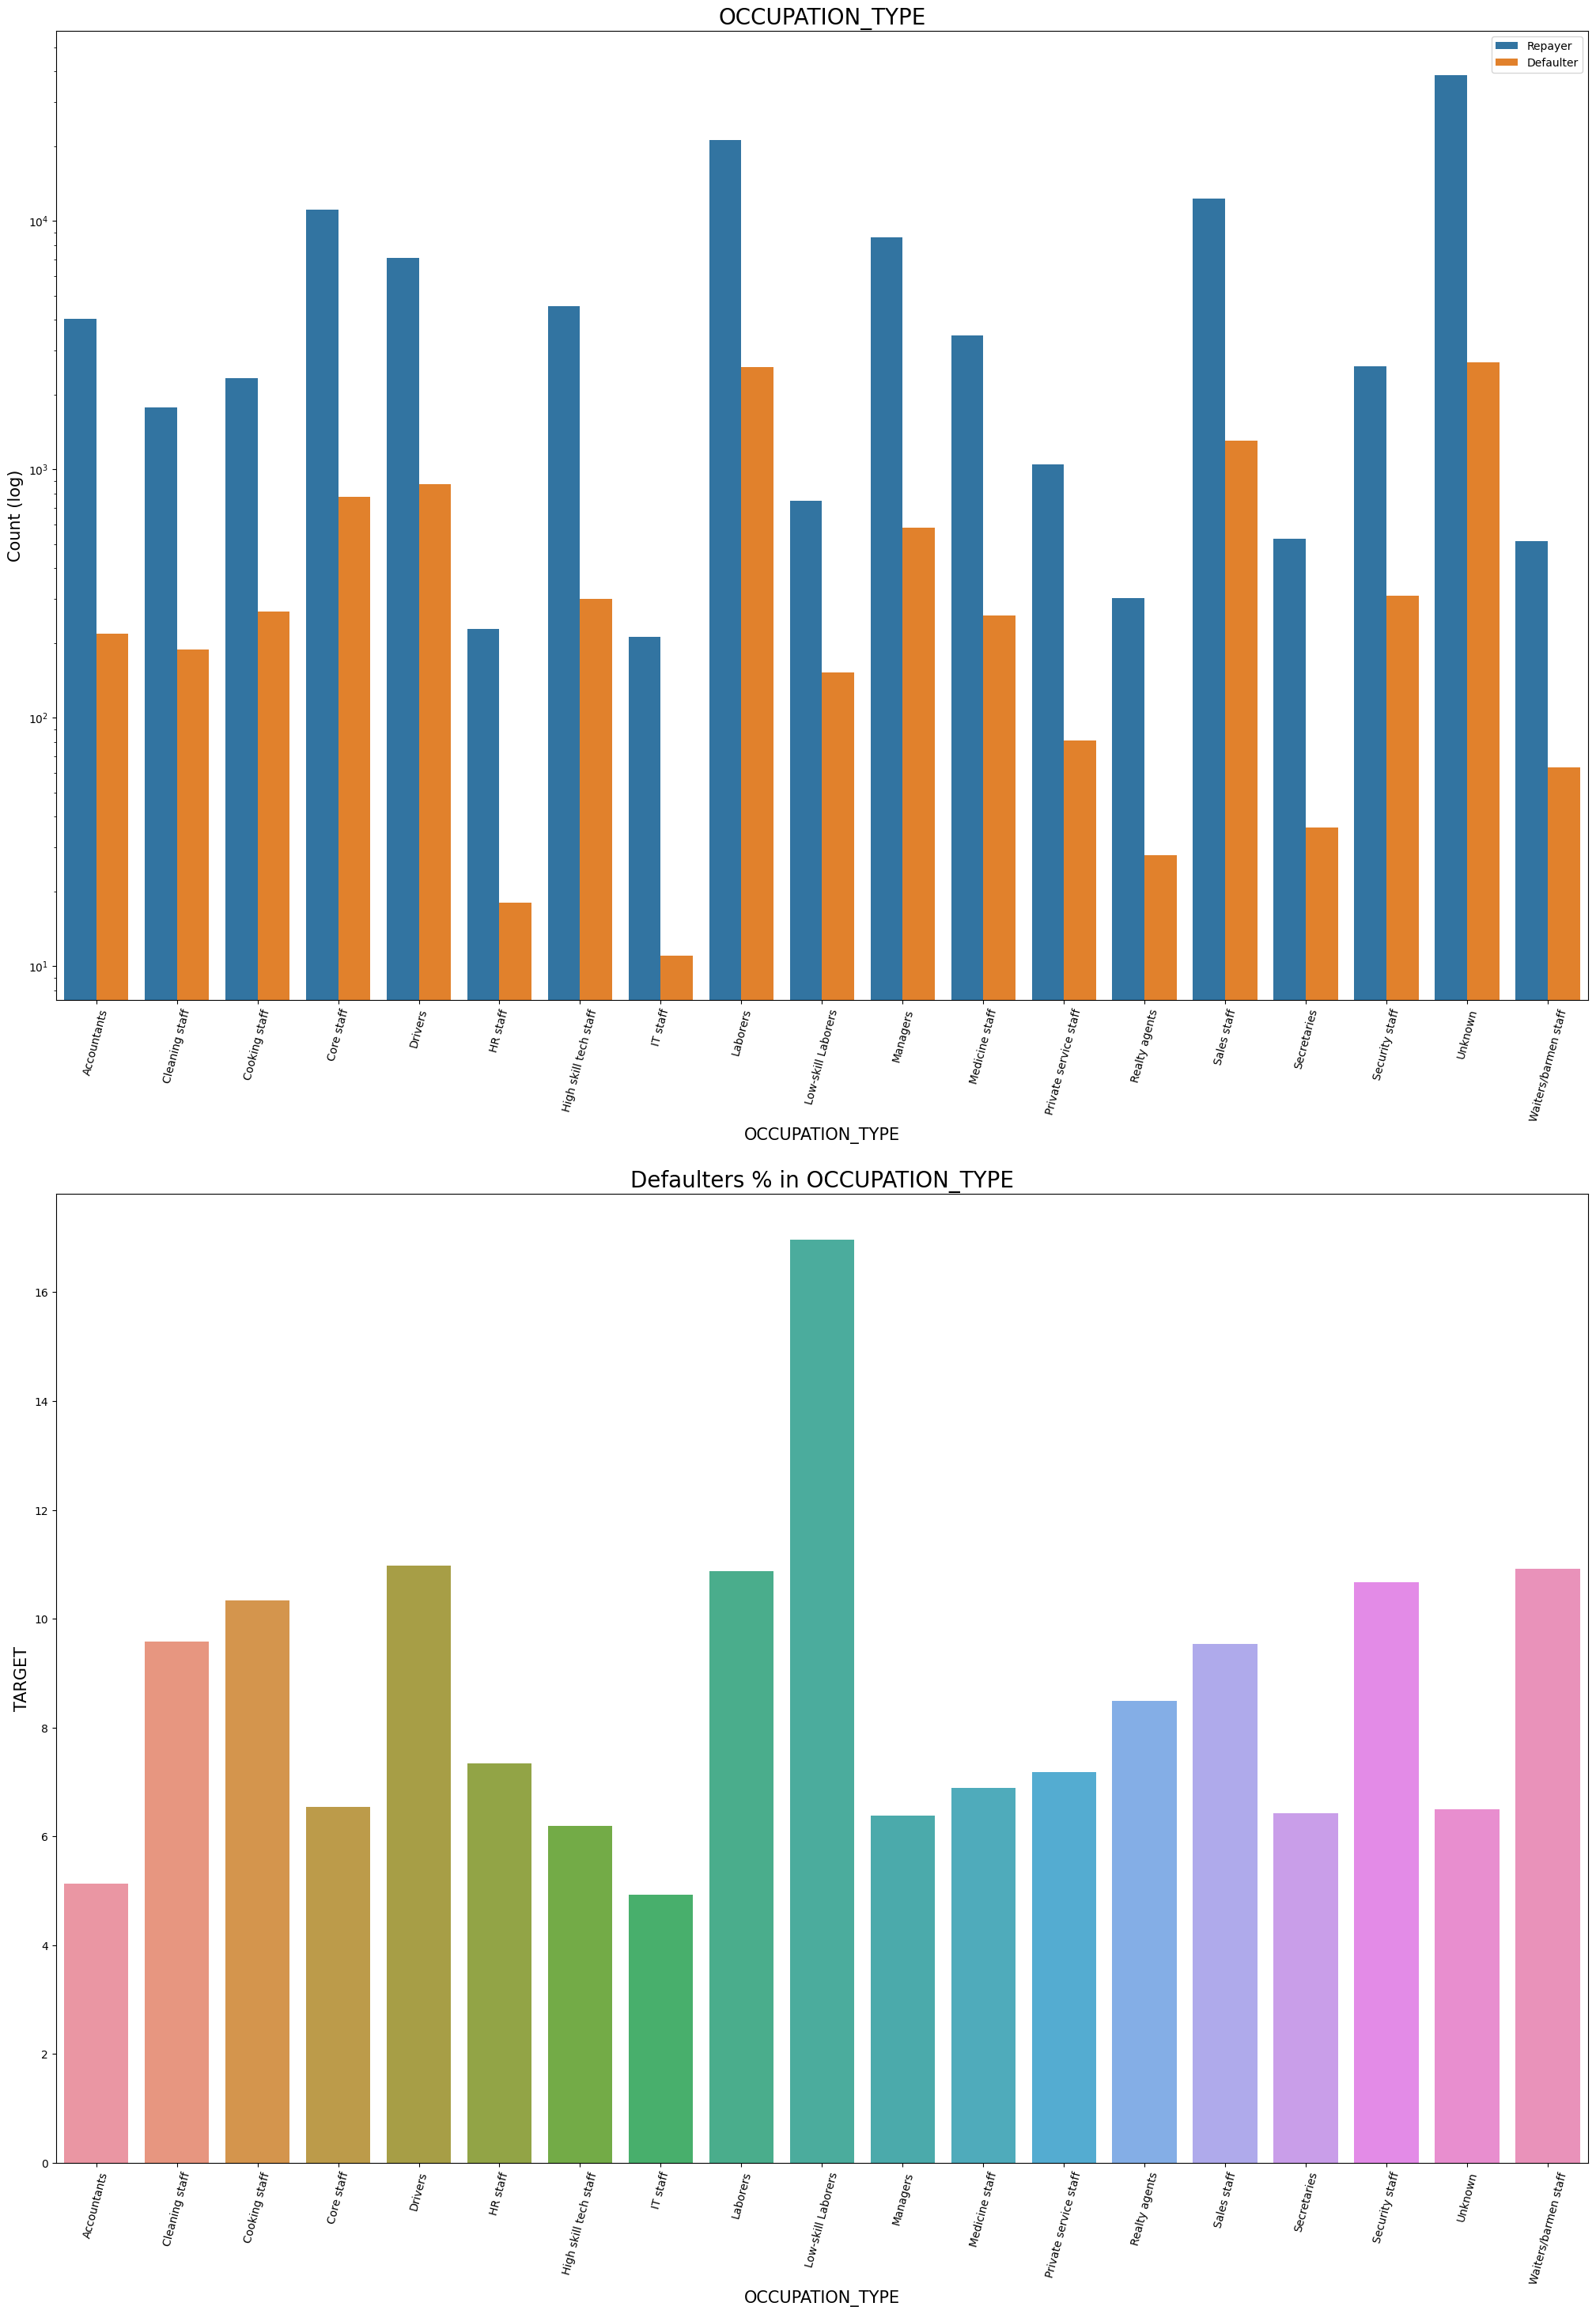

In [166]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(apd,"OCCUPATION_TYPE","TARGET",True,True,False)

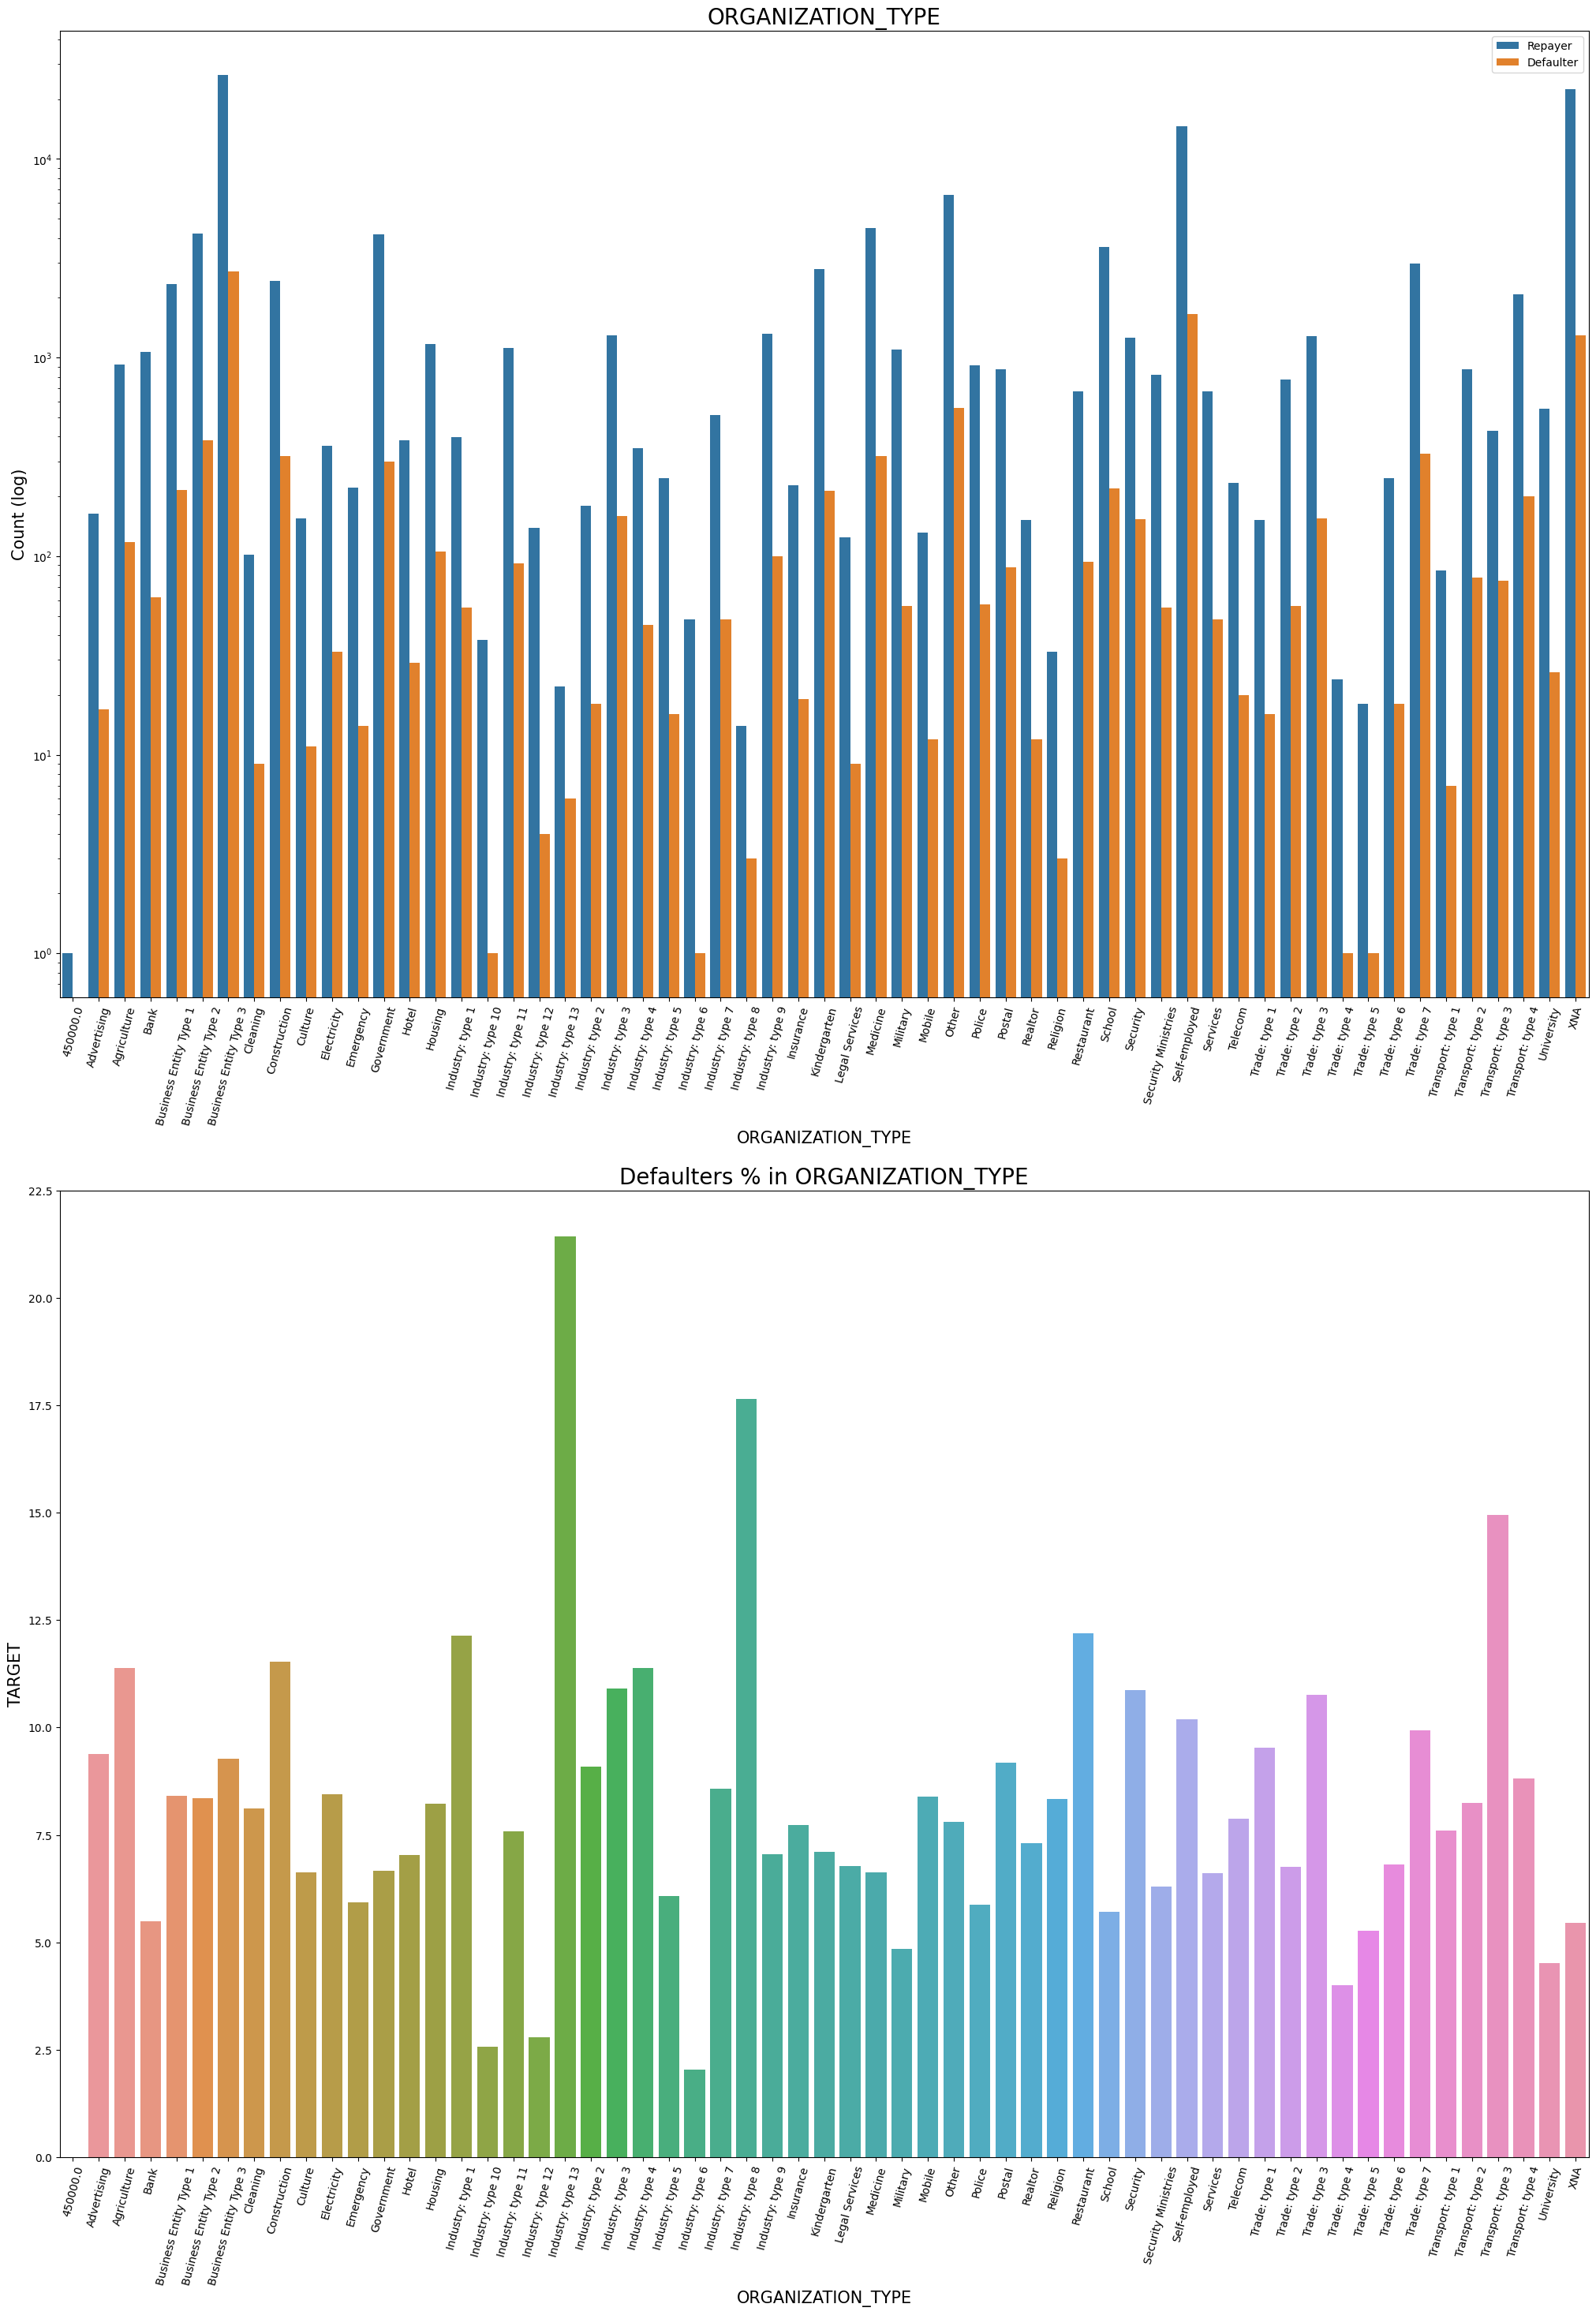

In [167]:
#10 Checking Loan repayment status based on Organization type

univariate(apd,"ORGANIZATION_TYPE","TARGET",True,True,False)

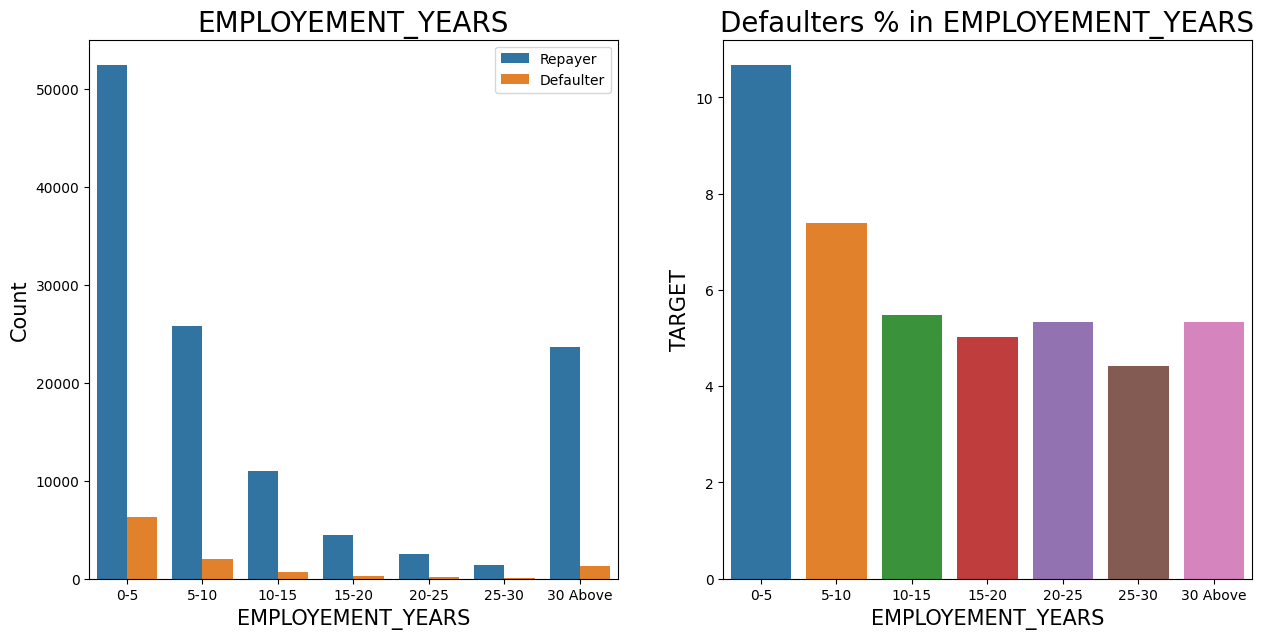

In [168]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(apd,"EMPLOYEMENT_YEARS","TARGET",False,False,True)

In [169]:
apd.loc[:,["EMPLOYEMENT_YEARS","TARGET"]].value_counts()

EMPLOYEMENT_YEARS  TARGET
0-5                0         52404
5-10               0         25757
30 Above           0         23706
10-15              0         11038
0-5                1          6257
15-20              0          4416
20-25              0          2555
5-10               1          2056
25-30              0          1364
30 Above           1          1337
10-15              1           640
15-20              1           234
20-25              1           144
25-30              1            63
dtype: int64

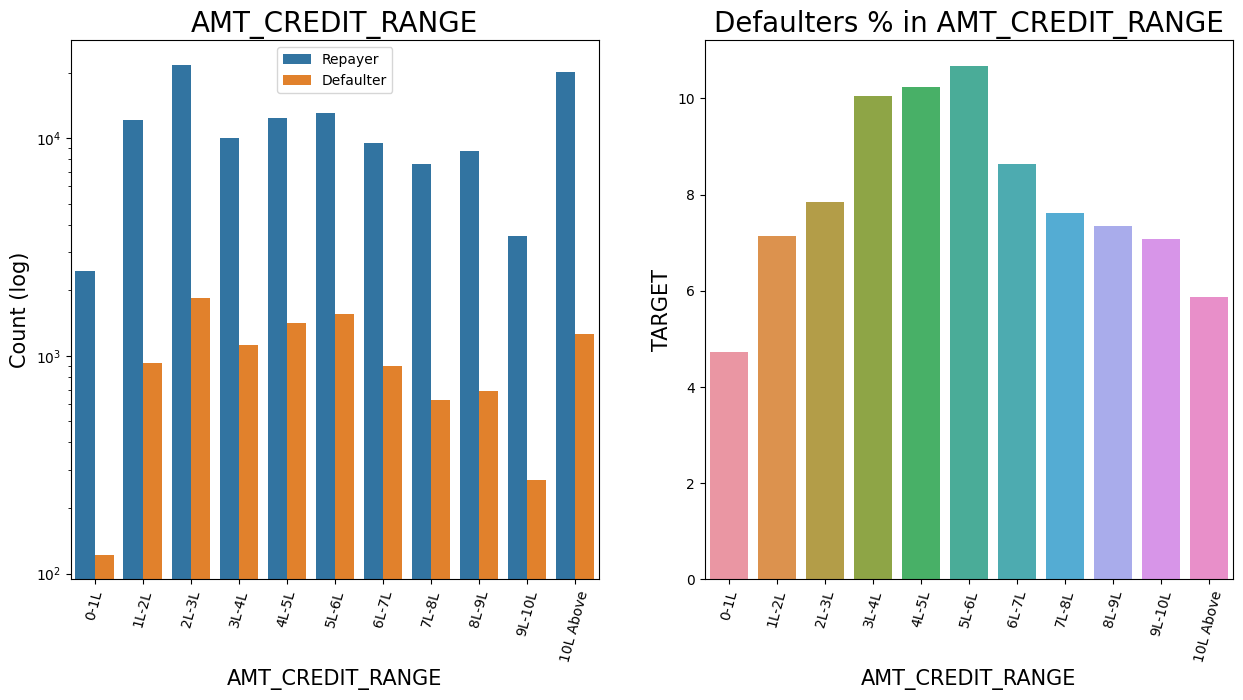

In [170]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(apd,"AMT_CREDIT_RANGE","TARGET",True,True,True)

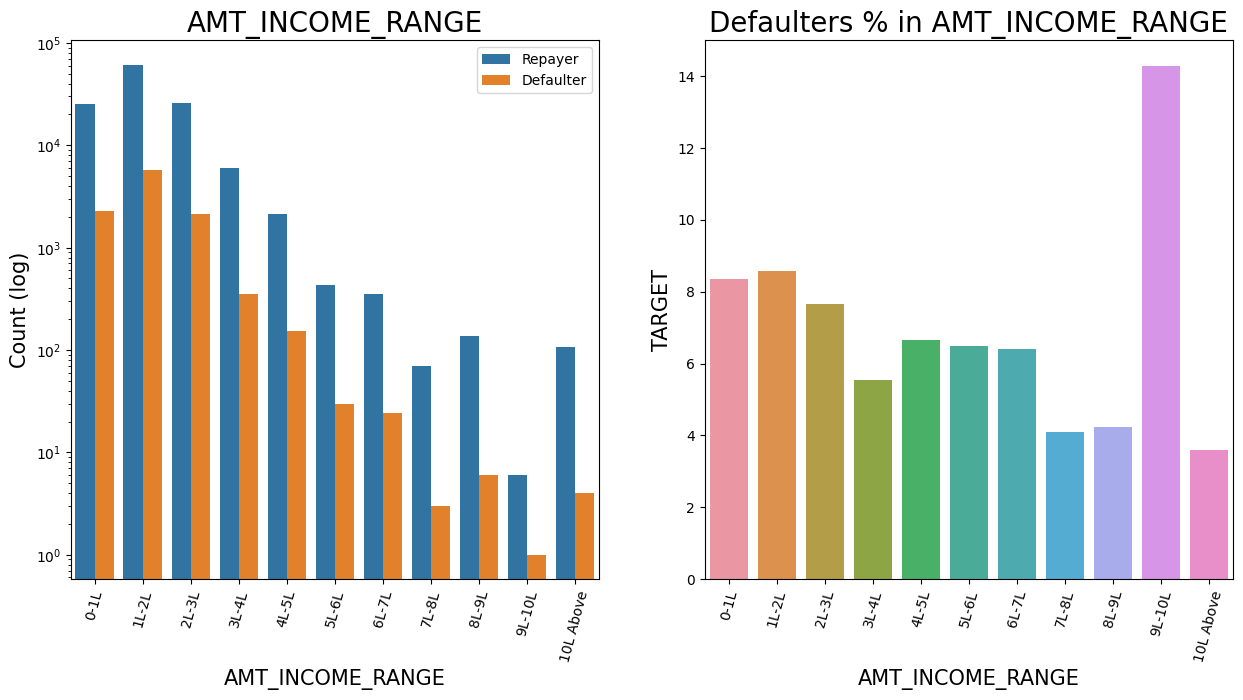

In [171]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(apd,"AMT_INCOME_RANGE","TARGET",True,True,True)

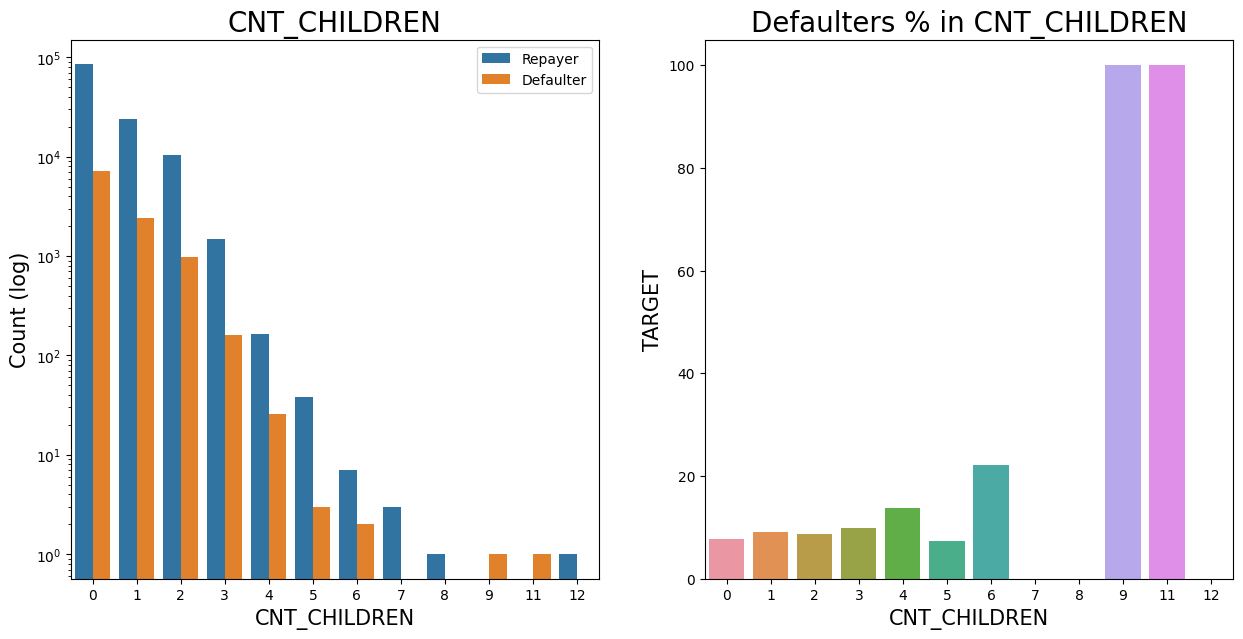

In [172]:
#14  Analyzing Number of children based on loan repayment status

univariate(apd,"CNT_CHILDREN","TARGET",True,False,True)

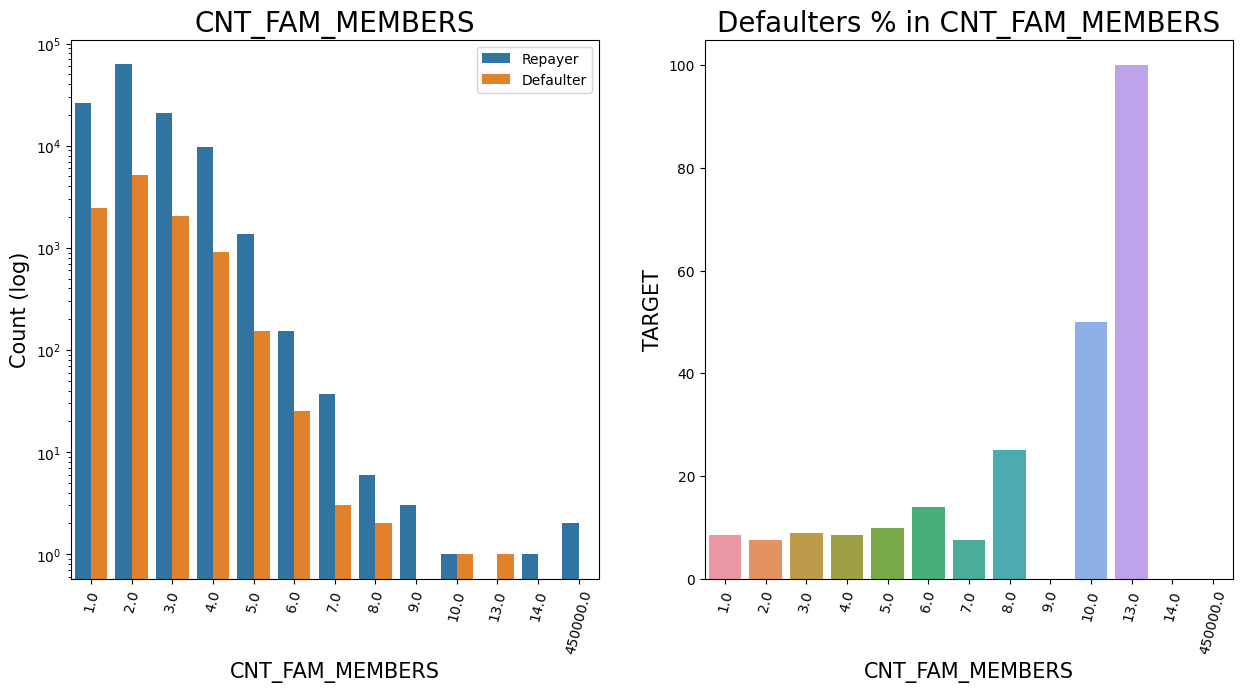

In [173]:
#15 Analyzing Number of family members based on loan repayment status
univariate(apd,"CNT_FAM_MEMBERS","TARGET",True,True,True)

In [174]:
#MULTI/BI VARAITE ANALYSIS

In [175]:
apd.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count       mean       std     min      25%    50%  \
NAME_INCOME_TYPE                                                             
Businessman               4.0  10.012500  8.851589  1.8000  5.51250  7.875   
Commercial associate  30707.0   2.027071  1.255536  0.2700  1.35000  1.800   
Maternity leave           2.0   2.475000  1.590990  1.3500  1.91250  2.475   
Pensioner             23748.0   1.361876  0.783558  0.2565  0.90000  1.170   
State servant          9240.0   1.795489  0.937029  0.2700  1.12500  1.575   
Student                  10.0   1.552500  0.495341  0.9000  1.18125  1.575   
Unemployed               11.0   1.319318  1.083663  0.3150  0.55125  0.900   
Working               68252.0   1.641985  4.577945  0.2565  1.12500  1.350   

                          75%       max  
NAME_INCOME_TYPE                         
Businessman           12.3750    22.500  
Commercial associate   2.2500    38.250  
Maternity leave        3.0375     3.600  
Pensioner              1.6515    22.500  
State servant          2.2500    13.500  
Student                1.8000     2.250  
Unemployed             2.0250     3.375  
Working                2.0250  1170.000

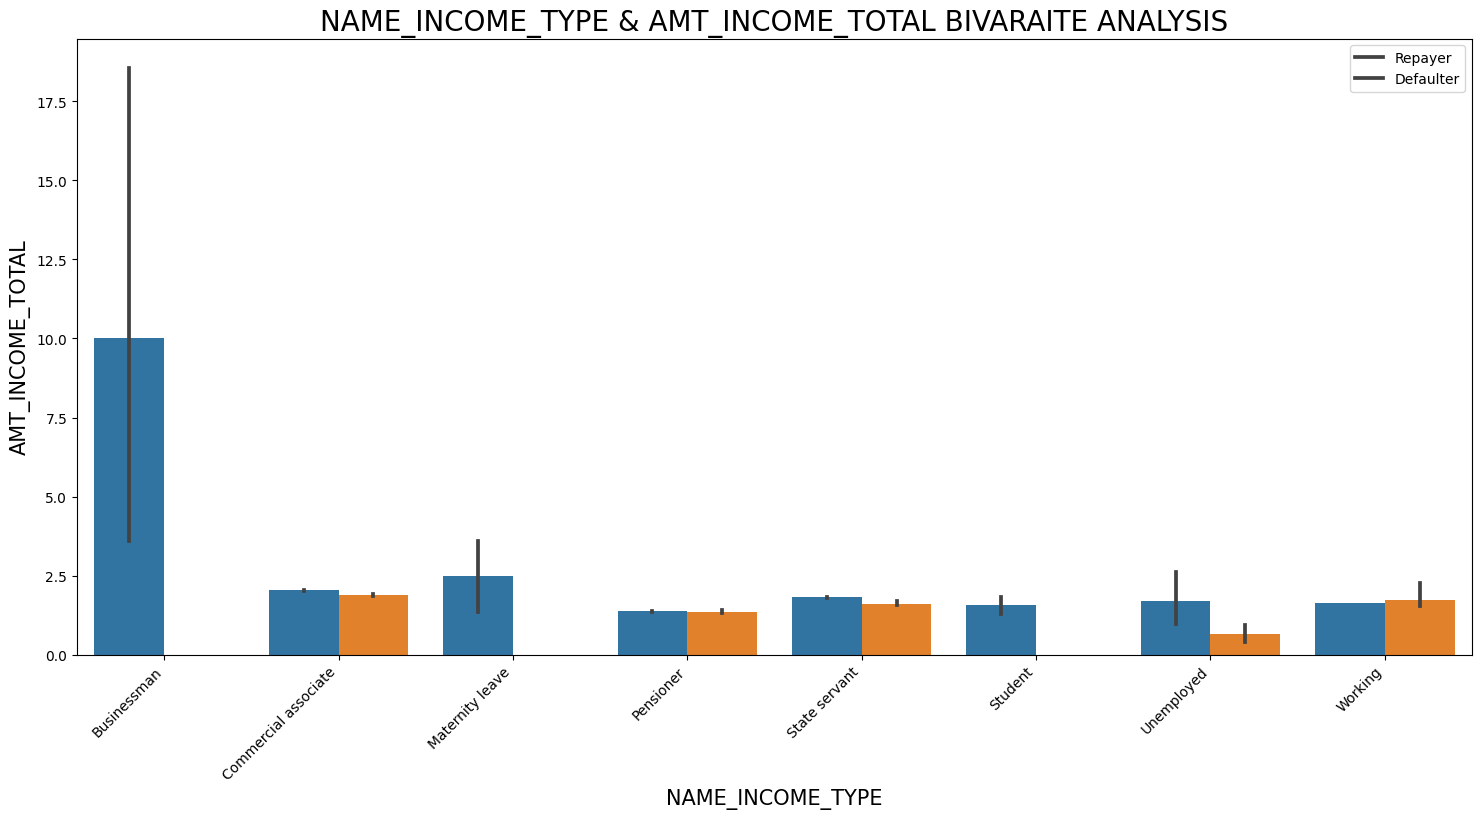

In [176]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",apd,"TARGET",(18,8),['Repayer','Defaulter'])

In [177]:
#numeric varaible analysis

In [178]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = apd.loc[apd['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = apd.loc[apd['TARGET']==1, cols_for_correlation]

<ipython-input-179-1fdd51df24b2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
<ipython-input-179-1fdd51df24b2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
<ipython-input-

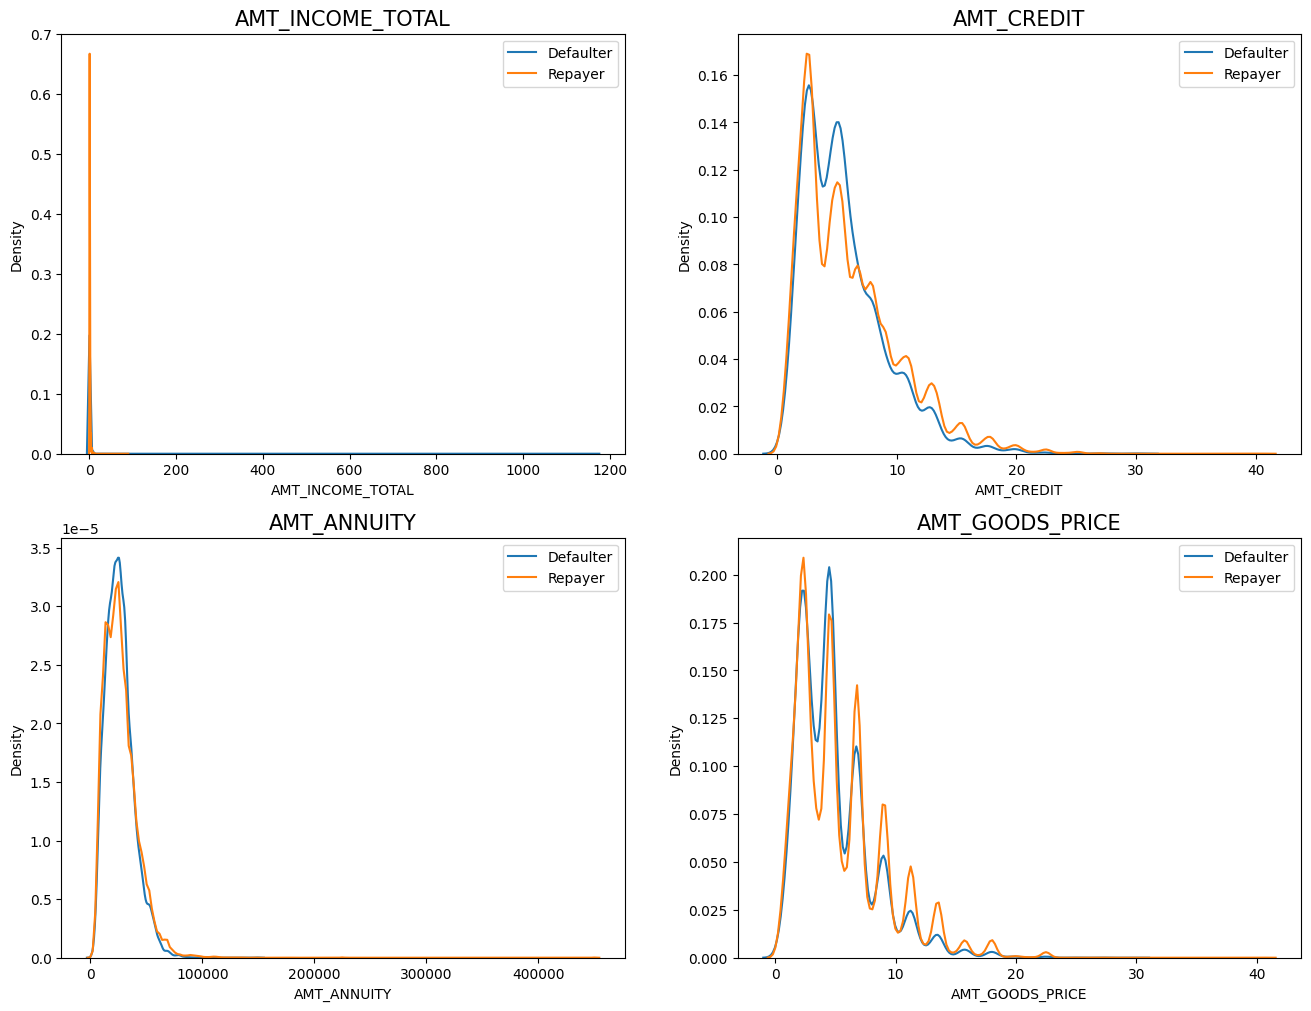

In [179]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = apd[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

In [180]:
#NUMERICAL VARIABLES' BIVARIATE ANALYSIS

<Figure size 1500x1500 with 0 Axes>

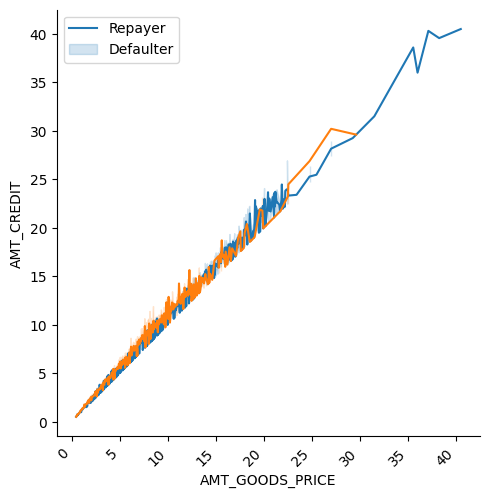

In [181]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',apd,"TARGET", "line",['Repayer','Defaulter'])

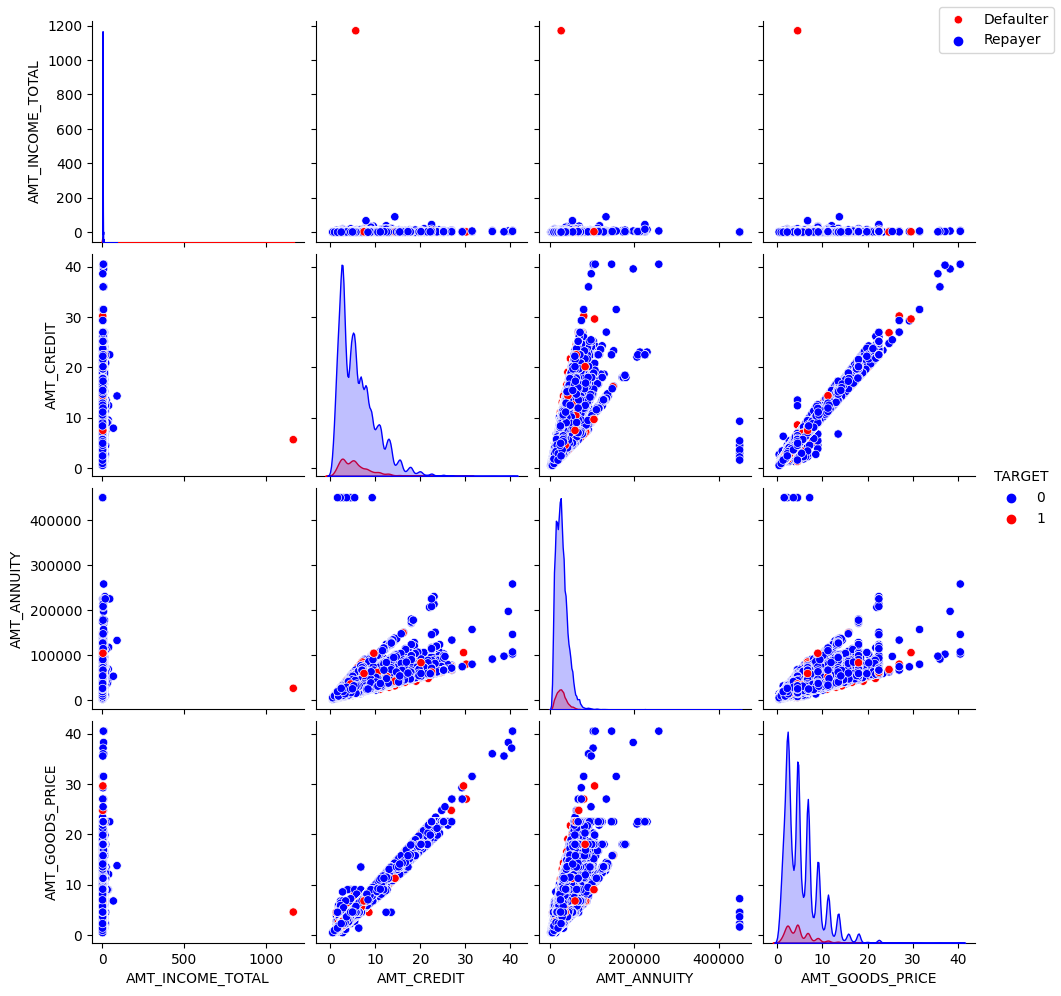

In [182]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = apd[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
#amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

In [183]:
#MERGING DATASETS

In [184]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(apd, pra, how='inner', on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100006       0           Cash loans           F            N   
1      100007       0           Cash loans           M            N   
2      100007       0           Cash loans           M            N   
3      100009       0           Cash loans           F            Y   
4      100011       0           Cash loans           F            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0               Y            0             1.350      3.126825        29686.5   
1               Y            0             1.215      5.130000        21865.5   
2               Y            0             1.215      5.130000        21865.5   
3               Y            1             1.710     15.607260        41301.0   
4               Y            0             1.125     10.196100        33826.5   

   ...  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  \
0  ...         48.0       low_normal                Cash X-Sell: low   
1  ...         18.0             high               Cash Street: high   
2  ...         48.0           middle             Cash X-Sell: middle   
3  ...         12.0       low_action  POS household without interest   
4  ...          0.0              XNA                            Cash   

  DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0           365243.0          151.0                    1259.0          151.0   
1           365243.0          834.0                     324.0          354.0   
2                NaN            NaN                       NaN            NaN   
3           365243.0          418.0                      88.0           88.0   
4                NaN            NaN                       NaN            NaN   

   DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  YEARLY_DECISION  
0             143.0                        0.0                1  
1             347.0                        0.0                3  
2               NaN                        0.0                3  
3              84.0                        0.0                2  
4               NaN                        0.0                4  

[5 rows x 111 columns]

In [185]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

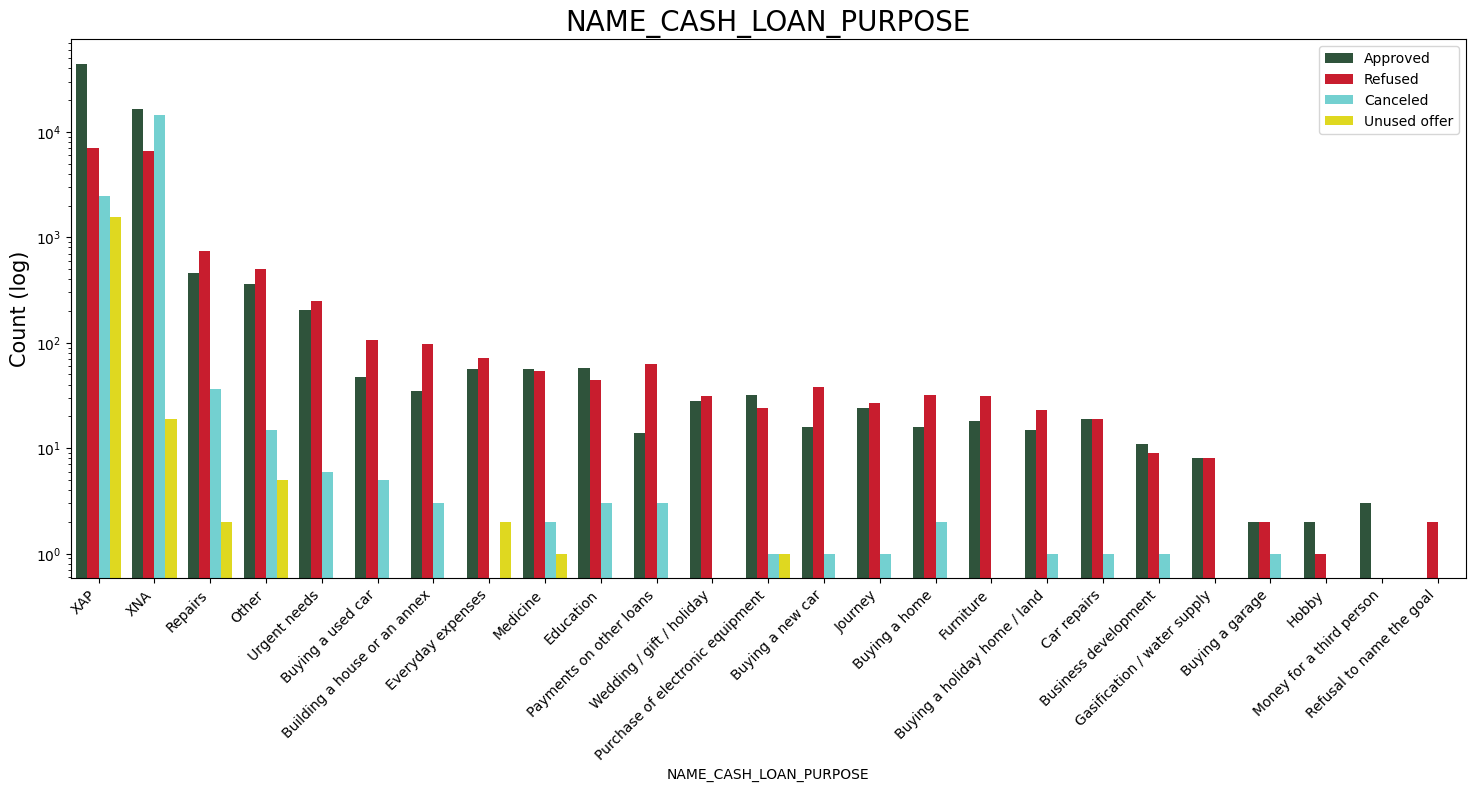

In [186]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

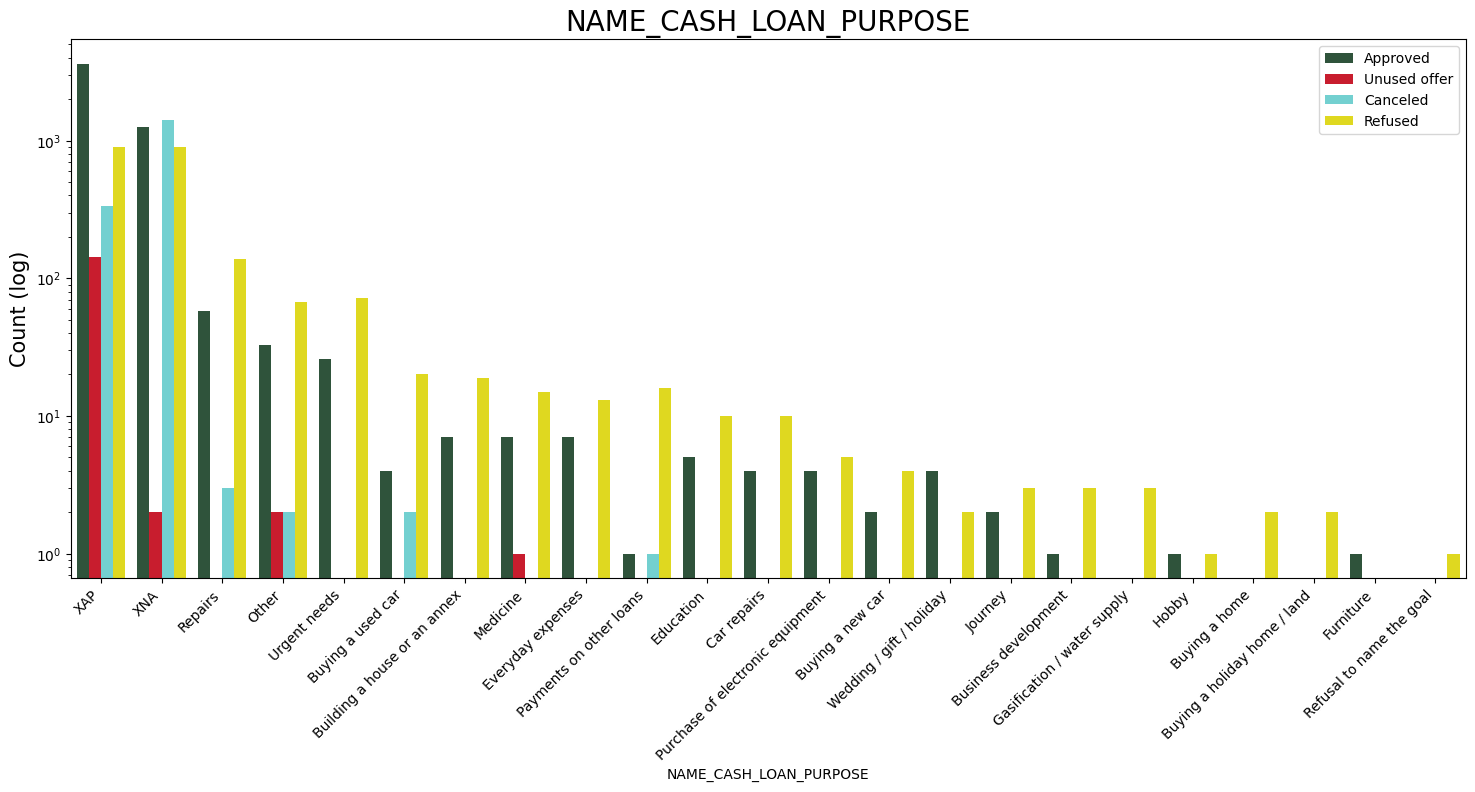

In [187]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

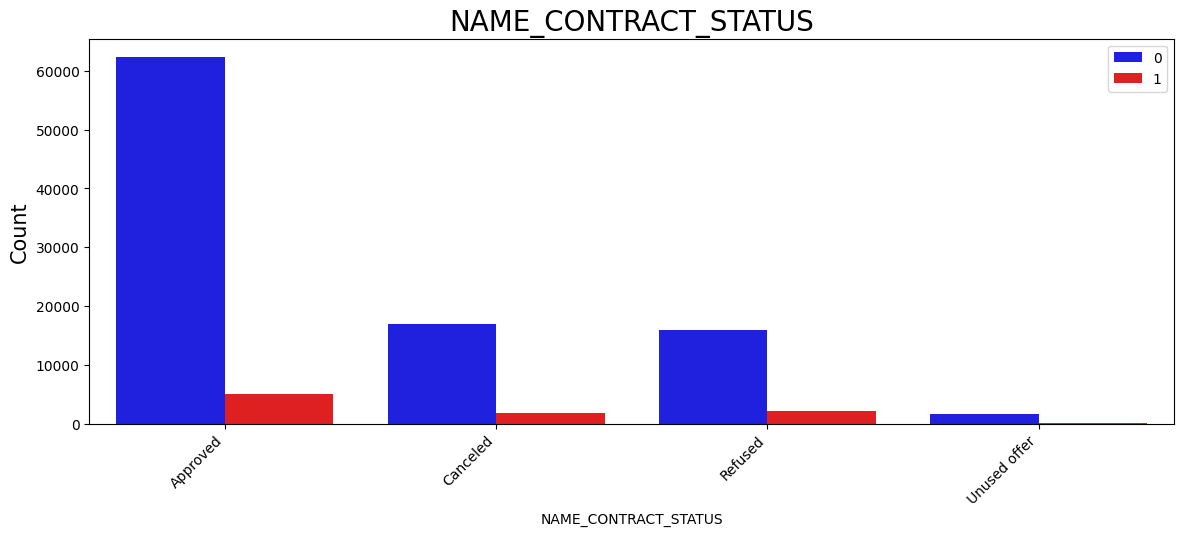

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0        62327      92.5%
                     1         5051       7.5%
Canceled             0        16983     90.62%
                     1         1757      9.38%
Refused              0        15868     87.82%
                     1         2200     12.18%
Unused offer         0         1589     91.48%
                     1          148      8.52%

In [188]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['b','r'],False,(14,5))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

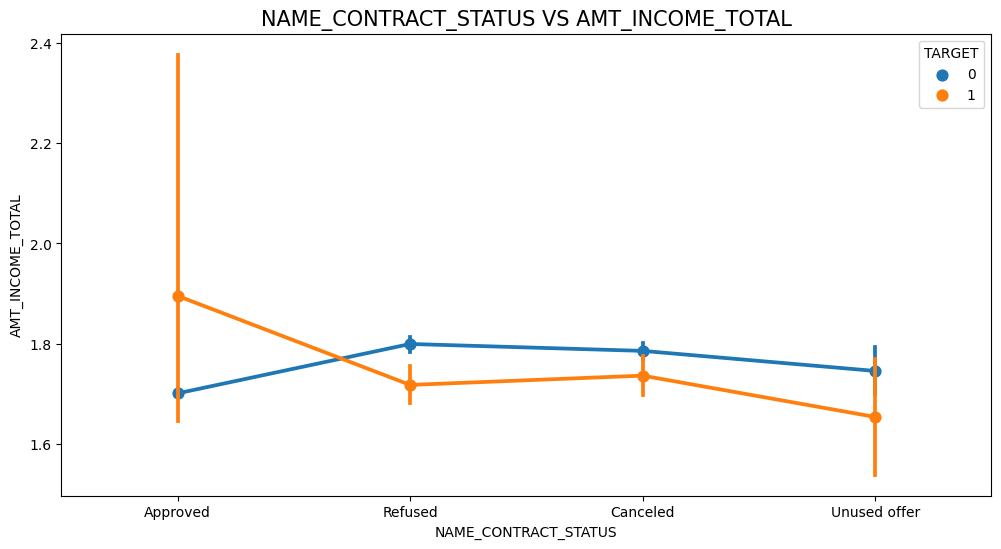

In [189]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

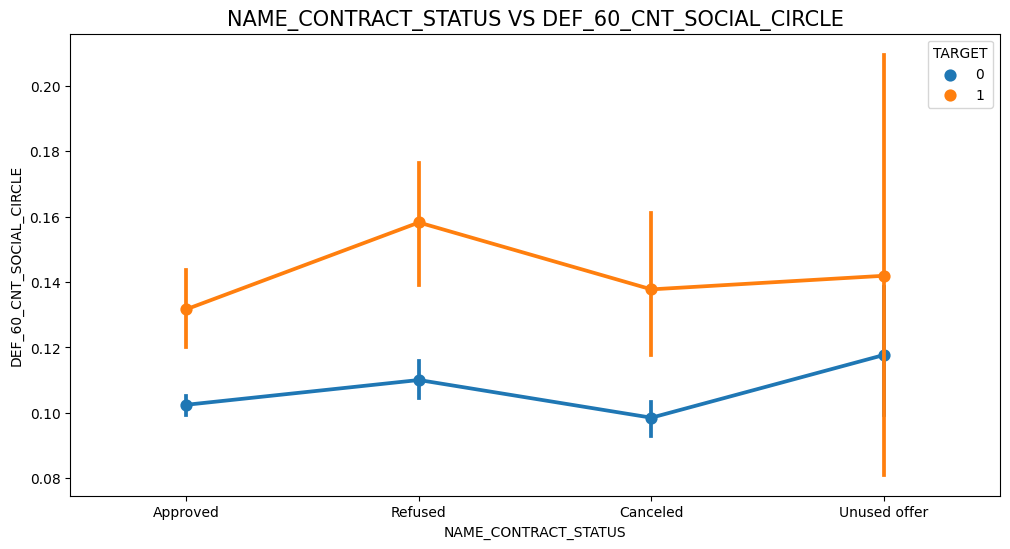

In [190]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

In [191]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

<ipython-input-191-b7872952de8c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = Repayer_df.corr()


VAR1                        VAR2  Correlation
214  REG_REGION_NOT_LIVE_REGION  REGION_POPULATION_RELATIVE     1.000000
298             FLAG_DOCUMENT_3  REGION_POPULATION_RELATIVE     1.000000
304             FLAG_DOCUMENT_3  REG_REGION_NOT_LIVE_REGION     1.000000
219  REG_REGION_NOT_LIVE_REGION     HOUR_APPR_PROCESS_START     0.999997
193     HOUR_APPR_PROCESS_START  REGION_POPULATION_RELATIVE     0.999997
303             FLAG_DOCUMENT_3     HOUR_APPR_PROCESS_START     0.999997
64              AMT_GOODS_PRICE                  AMT_CREDIT     0.987071
65              AMT_GOODS_PRICE                 AMT_ANNUITY     0.756525
43                  AMT_ANNUITY                  AMT_CREDIT     0.751463
172             DAYS_ID_PUBLISH  REGION_POPULATION_RELATIVE     0.648320

In [192]:
corr_repayer = Defaulter_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

<ipython-input-192-49df463c4d25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = Defaulter_df.corr()


VAR1                        VAR2  Correlation
64             AMT_GOODS_PRICE                  AMT_CREDIT     0.982449
43                 AMT_ANNUITY                  AMT_CREDIT     0.750701
65             AMT_GOODS_PRICE                 AMT_ANNUITY     0.749340
131              DAYS_EMPLOYED                  DAYS_BIRTH     0.581386
351  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.313729
152          DAYS_REGISTRATION                  DAYS_BIRTH     0.292121
300            FLAG_DOCUMENT_3               DAYS_EMPLOYED     0.271970
263   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.260144
173            DAYS_ID_PUBLISH                  DAYS_BIRTH     0.249969
174            DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.227949

<ipython-input-193-02bebce9e4e5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


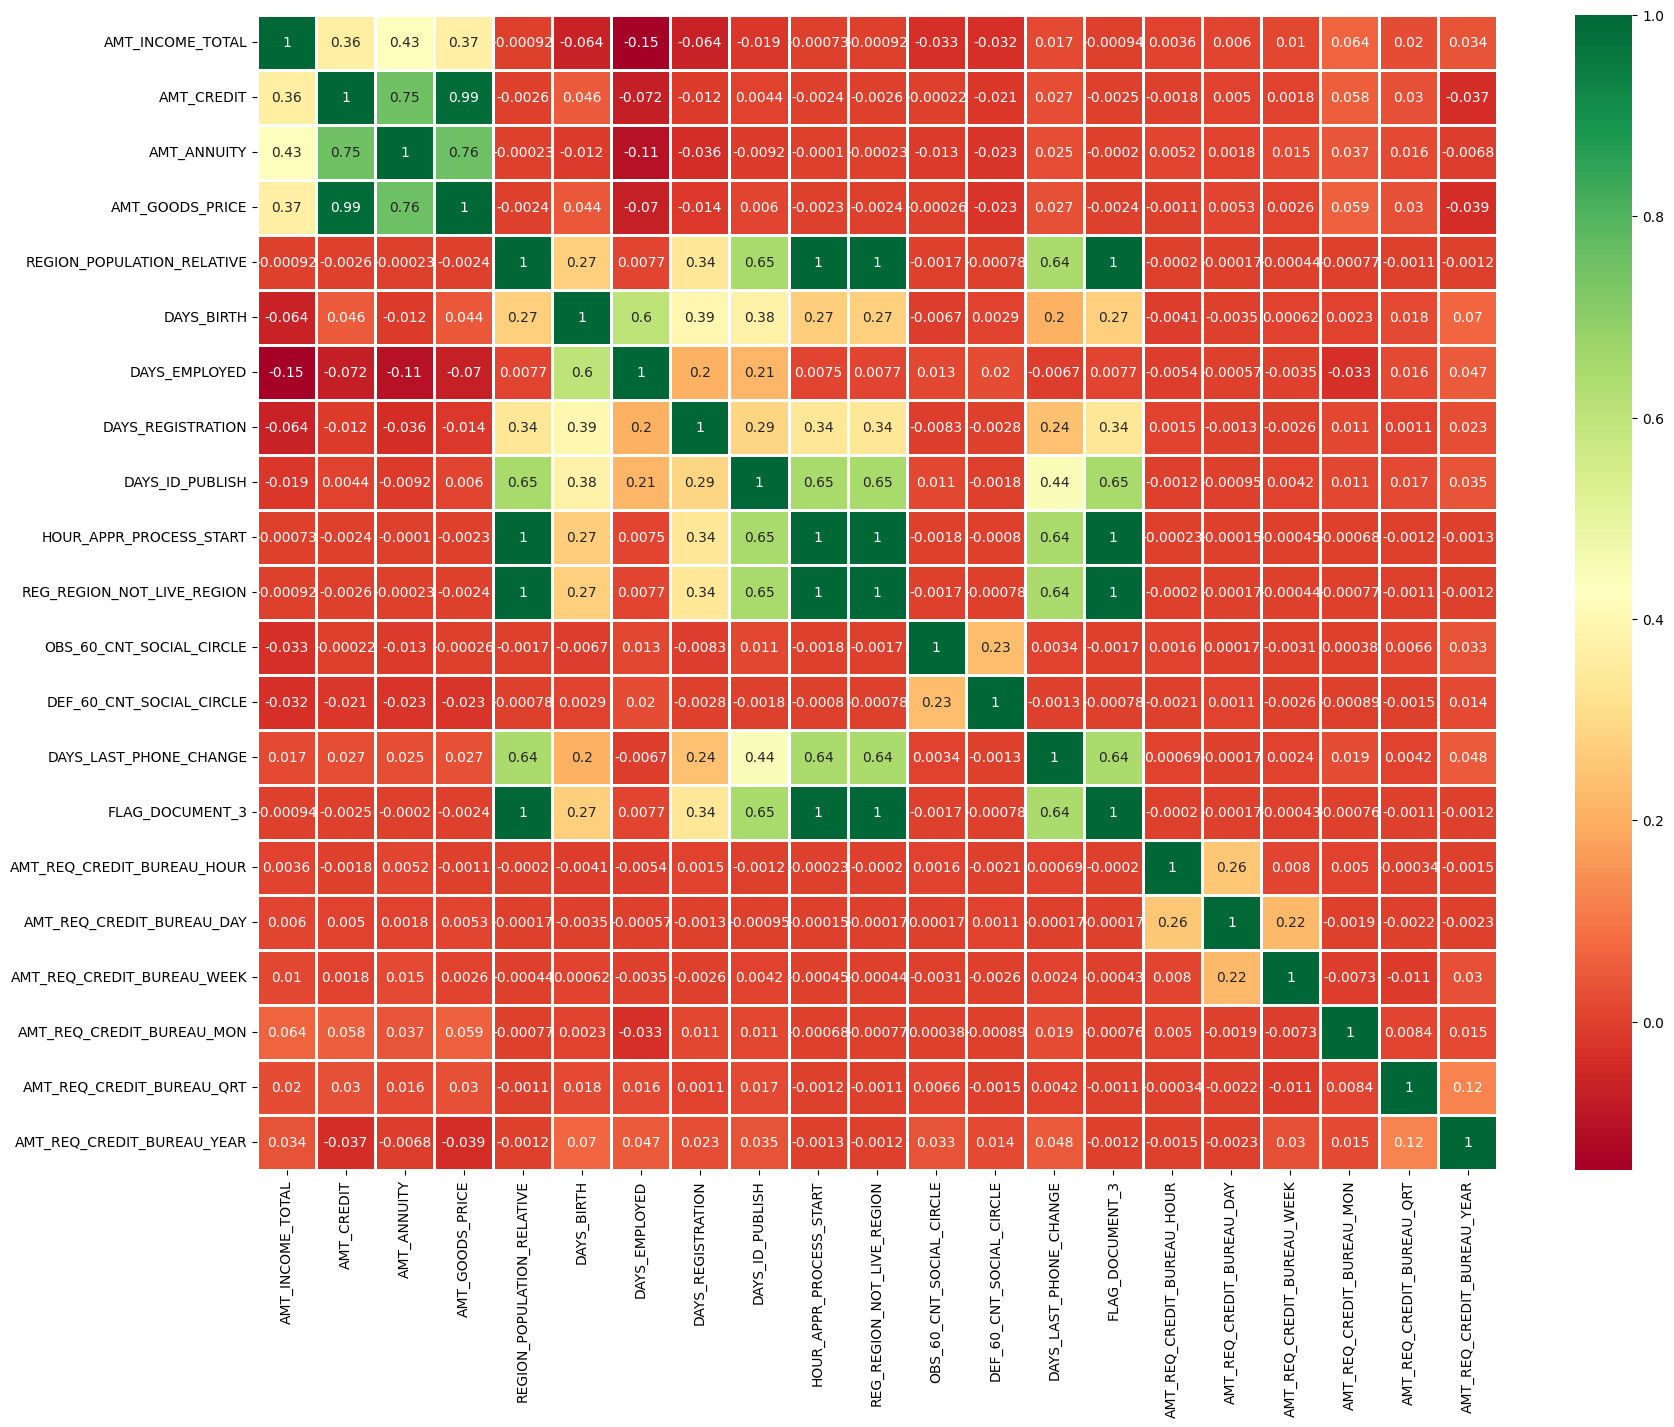

In [193]:
#plotting heatmap to see linear correlation amoung Repayers

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

<ipython-input-194-f5f011aa6aaa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


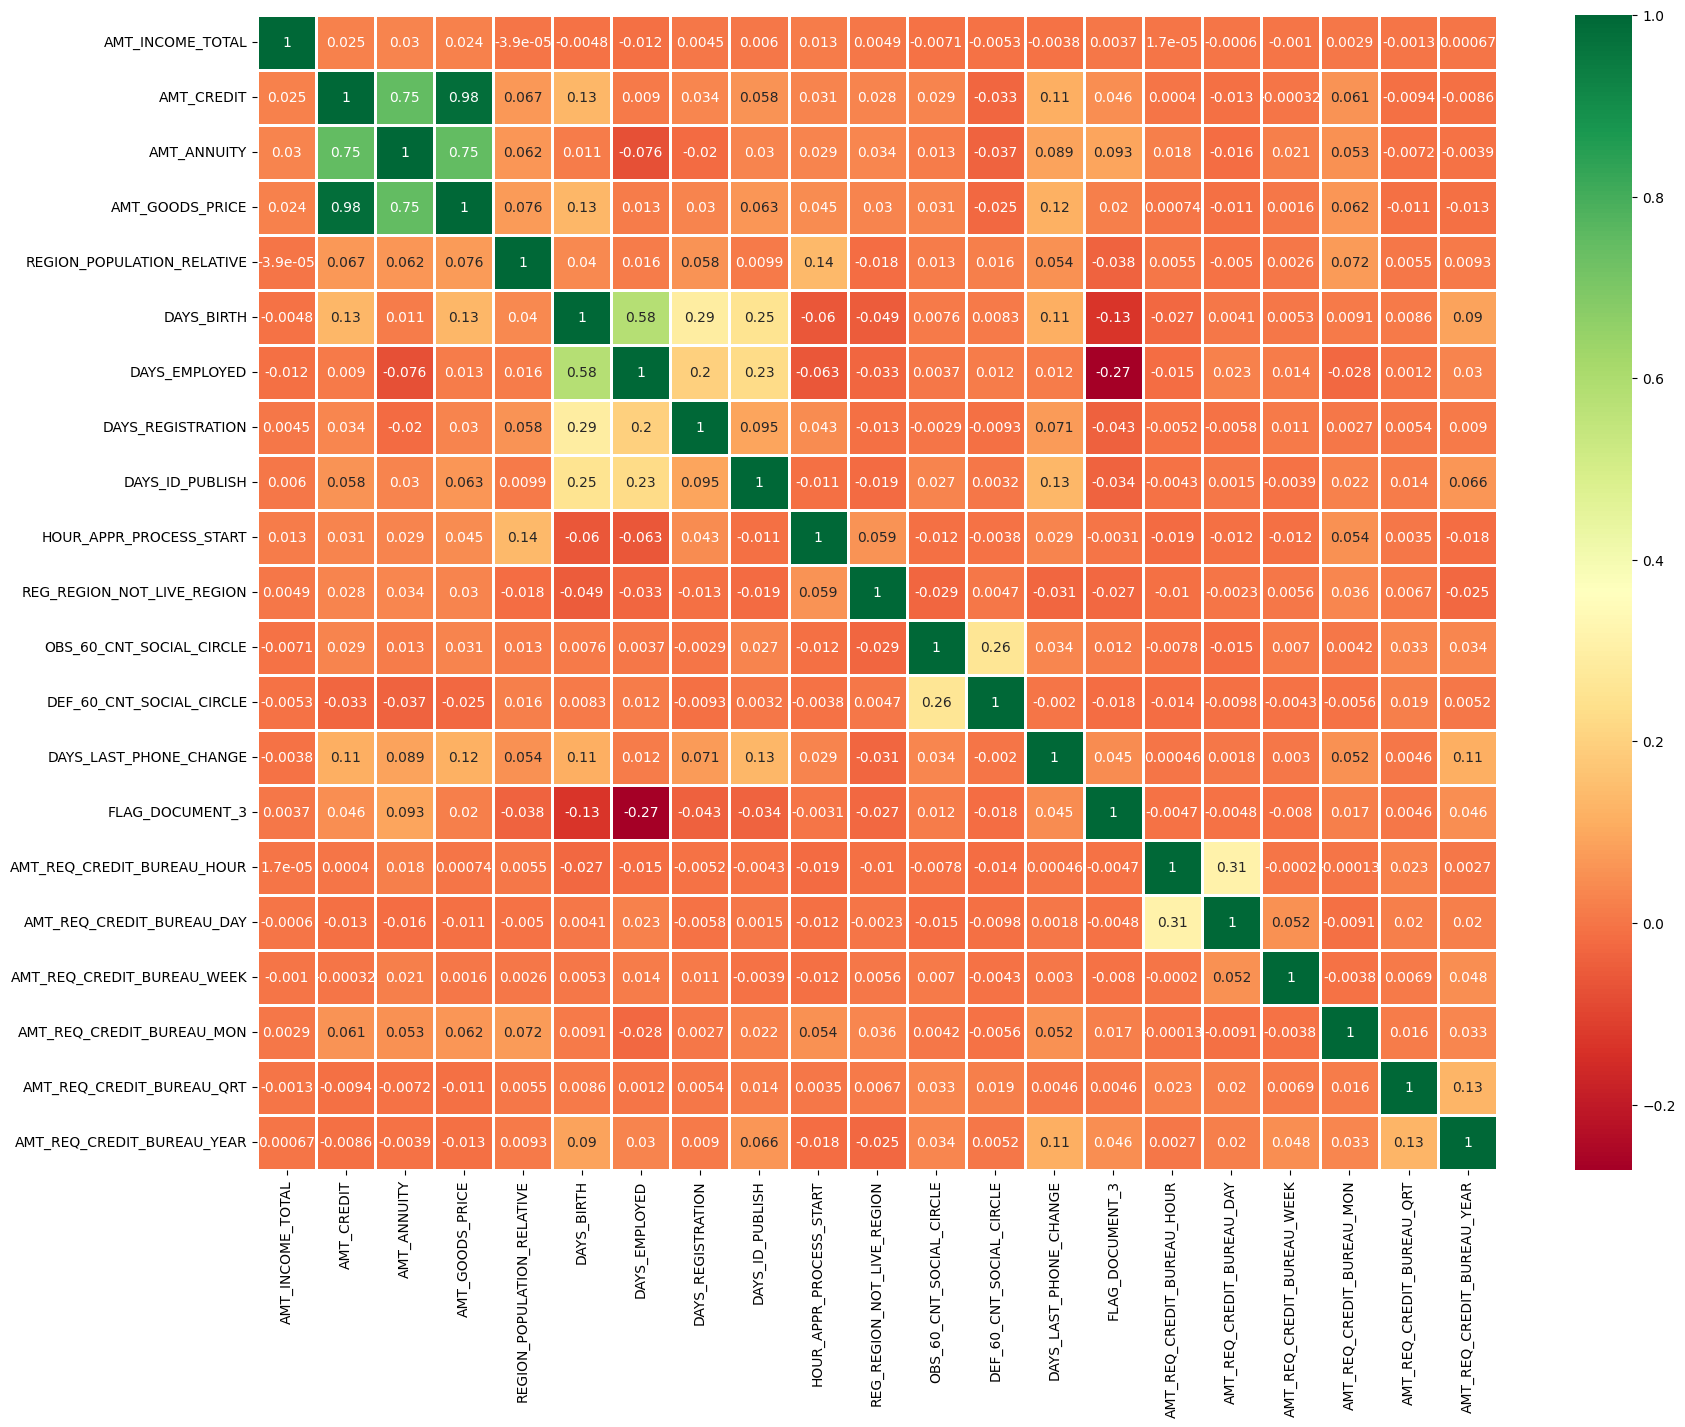

In [194]:
#plotting heatmap to see linear correlation amoung Repayers

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)